# Comparing Eulerian surface velocity fields from ocean-only (uncoupled) and ocean-wave (coupled) model simulations for the Mediterranean Sea

In [1]:
import os.path
from glob import glob

import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import colors
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.patches as patches

import xarray as xr
import numpy as np
from xhistogram.xarray import histogram

In [2]:
alpha = 0.5

col_blue = (68/255,119/255,170/255)
col_blue_alpha = (68/255,119/255,170/255,alpha)
col_cyan = (102/255,204/255,238/255)
col_green = (34/255,136/255,51/255)
col_yellow = (204/255,187/255,68/255)
col_yellow_alpha = (204/255,187/255,68/255,alpha)
col_red = (238/255,102/255,119/255)
col_purple = (170/255,51/255,119/255)
col_grey = (187/255, 187/255, 187/255)
col_grey_alpha = (187/255, 187/255, 187/255,alpha)
col_black_alpha = (0,0,0,0.65)

#not in original color scale
col_darkgrey = (50/255, 50/255, 50/255)

In [3]:
gridpath_tmp = '/storage/shared/oceanparcels/input_data/NEMO4p2_CMCC/domain/'

datapath = '/nethome/ruhs0001/DATA/IMMERSE/'

outpath_data = '/nethome/ruhs0001/IMMERSE_waves/develop-lorenz/data/CalculateSpeed_fulldepth_v5/'

outpath_figs = '/nethome/ruhs0001/IMMERSE_waves/develop-lorenz/figures/CompEulerian_uncoupledVScoupled_interp_fulldepth/'

In [4]:
gridpath = (gridpath_tmp + 'mesh_mask.nc')
grid = xr.open_dataset(gridpath, drop_variables=('x','y'))

regionmaskpath = (datapath + 'MEDregions.nc')
regionmask = xr.open_dataset(regionmaskpath).rename({'jm':'y','im':'x'})

In [5]:
grid

<xarray.Dataset>
Dimensions:       (nav_lev: 141, time_counter: 1, y: 380, x: 1307)
Coordinates:
  * nav_lev       (nav_lev) float32 1.018 3.166 5.465 ... 5.646e+03 5.754e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/40)
    tmask         (time_counter, nav_lev, y, x) int8 ...
    umask         (time_counter, nav_lev, y, x) int8 ...
    vmask         (time_counter, nav_lev, y, x) int8 ...
    fmask         (time_counter, nav_lev, y, x) int8 ...
    tmaskutil     (time_counter, y, x) int8 ...
    umaskutil     (time_counter, y, x) int8 ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 ...
    e3vw_0        (time_counter, nav_lev, y, x) float64 ...
    gdept_1d      (time_counter, nav_lev) float64 ...
    gdepw_1d      (time_counter, nav_lev) float64 ...
    gdept_0       (time_counter, nav_lev, y, x) float64 ...
    gdepw_0       (time_counter, nav_lev, y, x) float64 ...
Attributes: (12/18)
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [1307  380]
    DOMAIN_size_local:       [1307  380]
    DOMAIN_position_first:   [1 1]
    ...                      ...
    Iperio:                  0
    Jperio:                  0
    NFold:                   0
    NFtype:                  -
    VertCoord:               zps
    IsfCav:                  0

In [6]:
speed_tave_ds = xr.open_mfdataset(sorted(glob(outpath_data + 'Speed-tave-fulldepth-*.nc')),
                                  combine='nested', concat_dim='z')

speed_tsave_ds = xr.open_mfdataset(sorted(glob(outpath_data + 'Speed-tseasonave-fulldepth-*.nc')),
                                  combine='nested', concat_dim='z')

In [7]:
speed_rave_ds = xr.open_dataset(outpath_data + 'Speed-rave-z001.nc')

In [8]:
### DO NOT DELETE ###
# Cretae mask Med Sea (excluding Atlantic)
# only needs to be executed once
##base = speed_tave_ds.EncSc.isel(z=0) * 0
##test1 = base.where(base.nav_lon > -1, 1)
##test2 = base.where(base.nav_lat < 43, 1)
##test3 = test1 + test2
##test4 = test3.where(base.nav_lon > -5.7, 2)
##Mask_MedSea = ((test4.where(test4 != 2))*0+1).rename('Mask_MedSea')
##Mask_MedSea.to_netcdf('/nethome/ruhs0001/IMMERSE_waves/develop-lorenz/data/CalculateSpeed_fulldepth_v5/' + 'Mask_MedSea.nc')

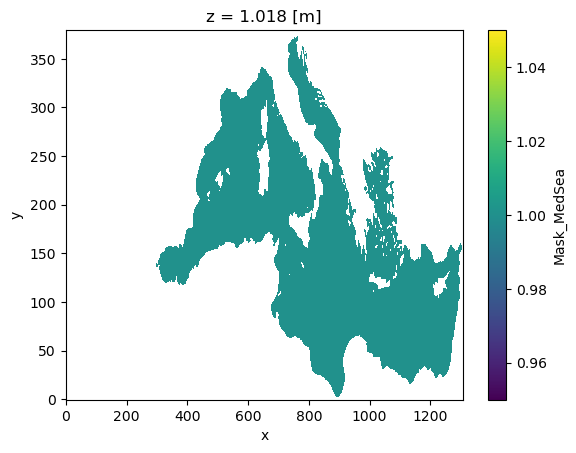

In [9]:
Mask_MedSea_reload = xr.open_dataset('/nethome/ruhs0001/IMMERSE_waves/develop-lorenz/data/CalculateSpeed_fulldepth_v5/' + 'Mask_MedSea.nc')
Mask_MedSea_reload.Mask_MedSea.plot()

## Spatially averaged temporal evolution of Lagrangian speed and impact of waves

In [10]:
speed_rsave_imp_al = speed_rave_ds.EcSc - speed_rave_ds.Enc
speed_rsave_imp_sd = speed_rave_ds.ScProjEcSc
speed_rsave_imp_ec = speed_rave_ds.EcSc - speed_rave_ds.ScProjEcSc - speed_rave_ds.Enc

(17897.0, 18627.0)

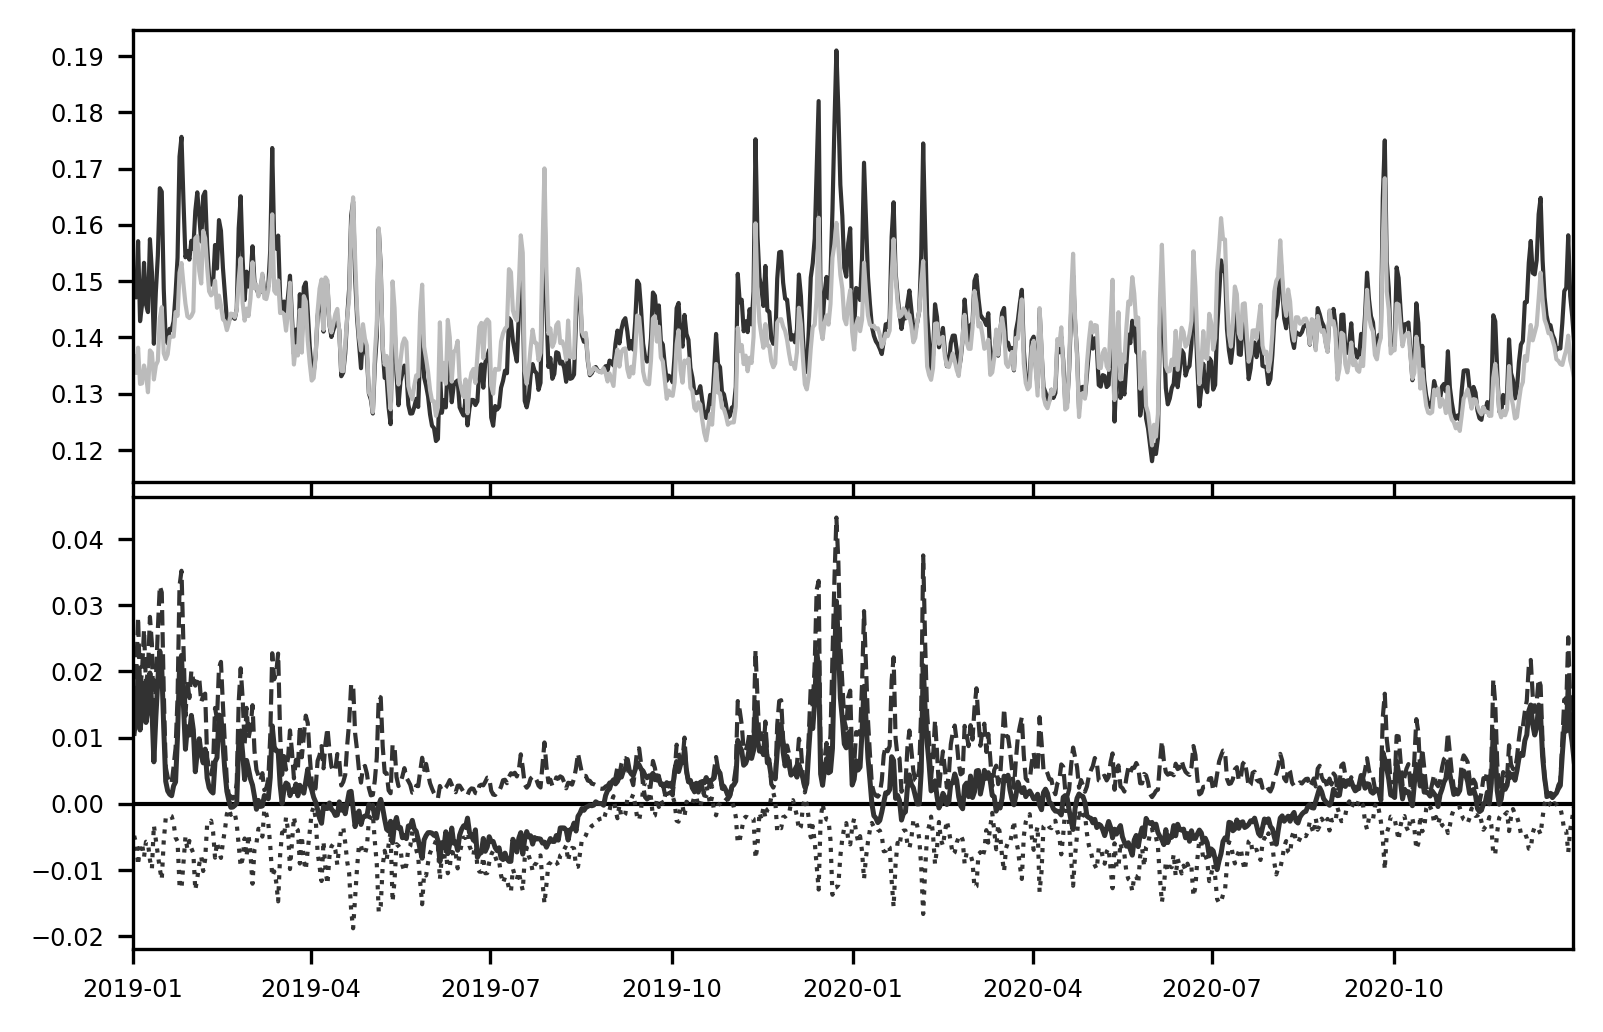

In [11]:
fs='xx-small'
lw=1.0
lw2=1.2
col=col_darkgrey
col2=col_grey

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:3])
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.EcSc,
        color=col, linewidth=lw)
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.Enc,
        color=col2, linewidth=lw)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_xticklabels([])

ax = fig.add_subplot(gs[2:4,0:3])
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
        color=col, linewidth=lw2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])


## Mean vertical profiles Lagrangian speed

In [12]:

speed_tsave_nc_xyave = speed_tsave_ds.Enc.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tsave_c_xyave = speed_tsave_ds.EcSc.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 

speed_tave_nc_xyave = speed_tave_ds.Enc.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tave_c_xyave = speed_tave_ds.EcSc.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 

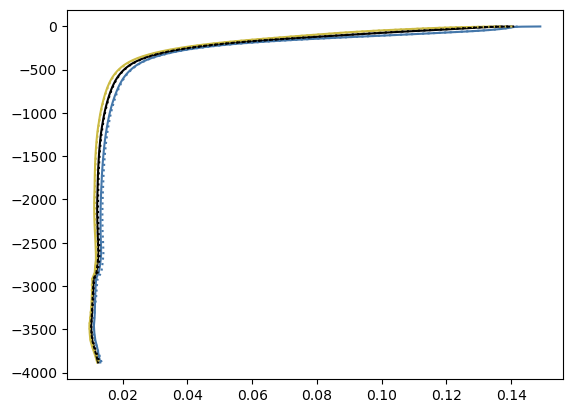

In [13]:
plt.plot(speed_tsave_c_xyave.sel(season='DJF'),-speed_tsave_c_xyave.z, color=col_blue)
plt.plot(speed_tsave_c_xyave.sel(season='JJA'),-speed_tsave_c_xyave.z, color=col_yellow)
plt.plot(speed_tave_c_xyave,-speed_tave_c_xyave.z, color='k')

plt.plot(speed_tsave_nc_xyave.sel(season='DJF'),-speed_tsave_nc_xyave.z, color=col_blue, linestyle='dotted')
plt.plot(speed_tsave_nc_xyave.sel(season='JJA'),-speed_tsave_nc_xyave.z, color=col_yellow, linestyle='dotted')
plt.plot(speed_tave_nc_xyave,-speed_tave_nc_xyave.z, color='k', linestyle='dotted')

## Calculate changes in vertical profiles of mean Lagrangian speed (coupled vs uncoupled)

The following procedure is adopted:
1) Calculate difference in annual/seasonal mean speed per grid point
3) Perform regional averaging

In [14]:
#speed_tsave_imp_al = speed_tsave_ds.EcSc - speed_tsave_ds.Enc
#speed_tsave_imp_sd = speed_tsave_ds.EcSc - speed_tsave_ds.Ec
#speed_tsave_imp_ec = speed_tsave_ds.Ec - speed_tsave_ds.Enc

#speed_tave_imp_al = speed_tave_ds.EcSc - speed_tave_ds.Enc
#speed_tave_imp_sd = speed_tave_ds.EcSc - speed_tave_ds.Ec
#speed_tave_imp_ec = speed_tave_ds.Ec - speed_tave_ds.Enc

speed_tsave_imp_al = speed_tsave_ds.EcSc - speed_tsave_ds.Enc
speed_tsave_imp_sd = speed_tsave_ds.ScProjEcSc
speed_tsave_imp_ec = speed_tsave_ds.EcSc - speed_tsave_ds.ScProjEcSc - speed_tsave_ds.Enc

speed_tave_imp_al = speed_tave_ds.EcSc - speed_tave_ds.Enc
speed_tave_imp_sd = speed_tave_ds.ScProjEcSc
speed_tave_imp_ec = speed_tave_ds.EcSc - speed_tave_ds.ScProjEcSc - speed_tave_ds.Enc#

In [15]:
speed_tsave_imp_al_xyave = speed_tsave_imp_al.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tsave_imp_sd_xyave = speed_tsave_imp_sd.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tsave_imp_ec_xyave = speed_tsave_imp_ec.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 

speed_tave_imp_al_xyave = speed_tave_imp_al.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tave_imp_sd_xyave = speed_tave_imp_sd.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 
speed_tave_imp_ec_xyave = speed_tave_imp_ec.where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim={'x','y'}, skipna=True) 

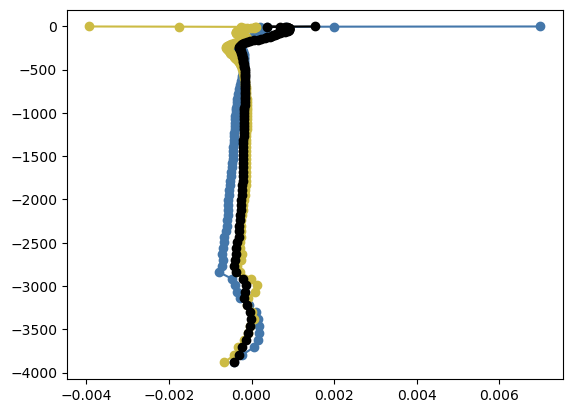

In [16]:
plt.plot(speed_tsave_imp_al_xyave.sel(season='DJF'),-speed_tsave_imp_al_xyave.z, marker='o', color=col_blue)
plt.plot(speed_tsave_imp_al_xyave.sel(season='JJA'),-speed_tsave_imp_al_xyave.z, marker='o', color=col_yellow)
plt.plot(speed_tave_imp_al_xyave,-speed_tave_imp_al_xyave.z, marker='o', color='k')

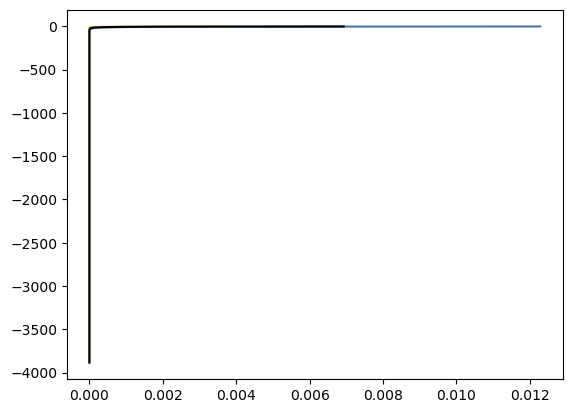

In [17]:
plt.plot(speed_tsave_imp_sd_xyave.sel(season='DJF'),-speed_tsave_imp_sd_xyave.z, color=col_blue)
plt.plot(speed_tsave_imp_sd_xyave.sel(season='JJA'),-speed_tsave_imp_sd_xyave.z, color=col_yellow)
plt.plot(speed_tave_imp_sd_xyave,-speed_tave_imp_sd_xyave.z, color='k')

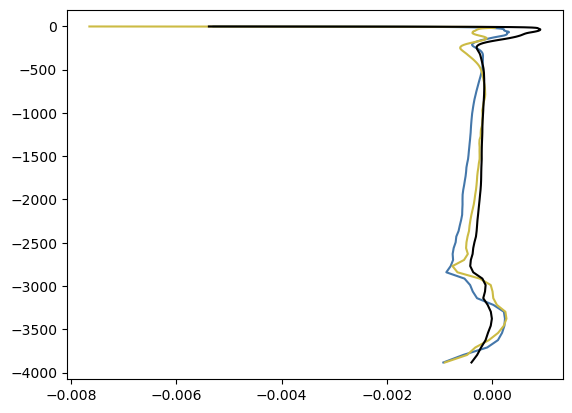

In [18]:
plt.plot(speed_tsave_imp_ec_xyave.sel(season='DJF'),-speed_tsave_imp_ec_xyave.z, color=col_blue)
plt.plot(speed_tsave_imp_ec_xyave.sel(season='JJA'),-speed_tsave_imp_ec_xyave.z, color=col_yellow)
plt.plot(speed_tave_imp_ec_xyave,-speed_tave_imp_ec_xyave.z, color='k')

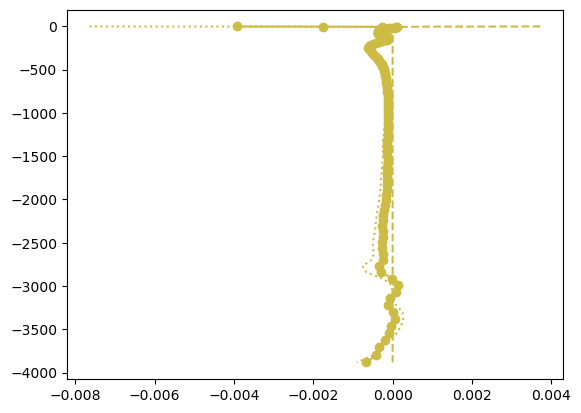

In [19]:
plt.plot(speed_tsave_imp_al_xyave.sel(season='JJA'),-speed_tsave_imp_al_xyave.z, marker='o', color=col_yellow)
plt.plot(speed_tsave_imp_sd_xyave.sel(season='JJA'),-speed_tsave_imp_sd_xyave.z, color=col_yellow, linestyle='dashed')
plt.plot(speed_tsave_imp_ec_xyave.sel(season='JJA'),-speed_tsave_imp_ec_xyave.z, color=col_yellow, linestyle='dotted')

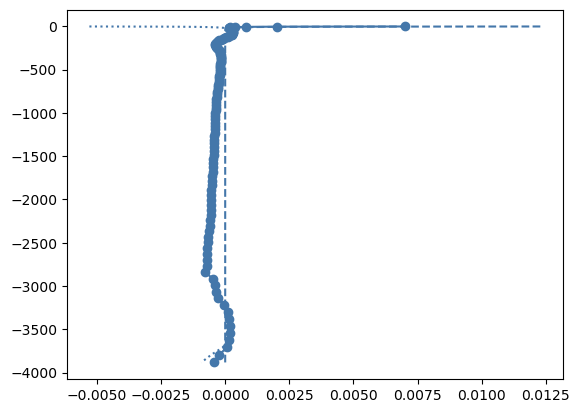

In [20]:
plt.plot(speed_tsave_imp_al_xyave.sel(season='DJF'),-speed_tsave_imp_al_xyave.z, marker='o', color=col_blue)
plt.plot(speed_tsave_imp_sd_xyave.sel(season='DJF'),-speed_tsave_imp_sd_xyave.z, color=col_blue, linestyle='dashed')
plt.plot(speed_tsave_imp_ec_xyave.sel(season='DJF'),-speed_tsave_imp_ec_xyave.z, color=col_blue, linestyle='dotted')

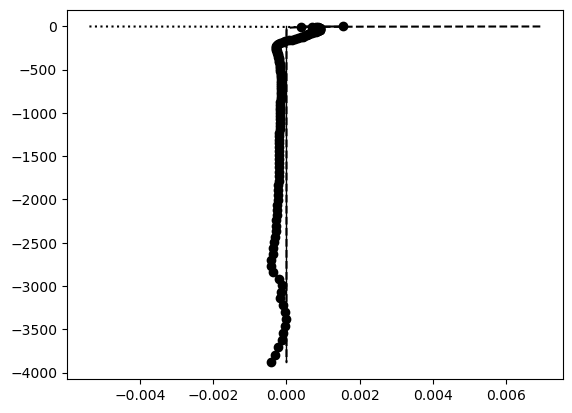

In [21]:
plt.plot(speed_tave_imp_ec_xyave*0,-speed_tsave_imp_ec_xyave.z, color='k', linewidth=1)
plt.plot(speed_tave_imp_al_xyave,-speed_tave_imp_al_xyave.z, marker='o', color='k')
plt.plot(speed_tave_imp_sd_xyave,-speed_tave_imp_sd_xyave.z, color='k', linestyle='dashed')
plt.plot(speed_tave_imp_ec_xyave,-speed_tave_imp_ec_xyave.z, color='k', linestyle='dotted')

(-0.013, 0.013)

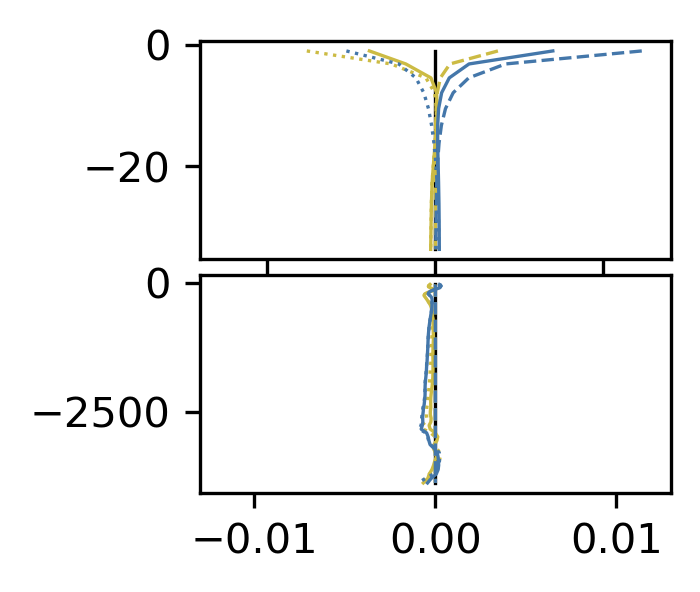

In [22]:
def plot_depthprofiles_impact(zmin,zmax,linew):
    plt.plot(speed_tsave_imp_ec_xyave.sel(season='DJF').isel(z=slice(zmin,zmax+1,1))*0,-speed_tsave_imp_ec_xyave.z.isel(z=slice(zmin,zmax+1,1)), color='k', linewidth=linew)
    plt.plot(speed_tsave_imp_al_xyave.sel(season='JJA').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_al_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_yellow, linewidth=linew,
             label='total JJA')
    plt.plot(speed_tsave_imp_sd_xyave.sel(season='JJA').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_sd_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_yellow, linewidth=linew, linestyle='dashed',
             label='Stokes JJA')
    plt.plot(speed_tsave_imp_ec_xyave.sel(season='JJA').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_ec_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_yellow, linewidth=linew, linestyle='dotted',
             label='Euler JJA')

    plt.plot(speed_tsave_imp_al_xyave.sel(season='DJF').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_al_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_blue, linewidth=linew,
             label='total DJF')
    plt.plot(speed_tsave_imp_sd_xyave.sel(season='DJF').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_sd_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_blue, linewidth=linew, linestyle='dashed',
             label='Stokes DJF')
    plt.plot(speed_tsave_imp_ec_xyave.sel(season='DJF').isel(z=slice(zmin,zmax+1,1)),-speed_tsave_imp_ec_xyave.z.isel(z=slice(zmin,zmax+1,1)),
             color=col_blue, linewidth=linew, linestyle='dotted',
             label='Euler DJF')

    #plt.plot(speed_tave_imp_al_xyave.isel(z=slice(zmin,zmax+1,1)),-speed_tave_imp_al_xyave.z.isel(z=slice(zmin,zmax+1,1)),
    #         color='k', linewidth=linew)
    #plt.plot(speed_tave_imp_sd_xyave.isel(z=slice(zmin,zmax+1,1)),-speed_tave_imp_sd_xyave.z.isel(z=slice(zmin,zmax+1,1)),
    #         color='k', linewidth=linew, linestyle='dashed')
    #plt.plot(speed_tave_imp_ec_xyave.isel(z=slice(zmin,zmax+1,1)),-speed_tave_imp_ec_xyave.z.isel(z=slice(zmin,zmax+1,1)),
    #         color='k', linewidth=linew, linestyle='dotted')

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)

ax = fig.add_subplot(gs[0:1,0:1])
plot_depthprofiles_impact(0,11,0.8)
ax.set_xlim([-0.014,0.014])
ax = fig.add_subplot(gs[1:2,0:1])
plot_depthprofiles_impact(12,122,0.8)
ax.set_xlim([-0.013,0.013])

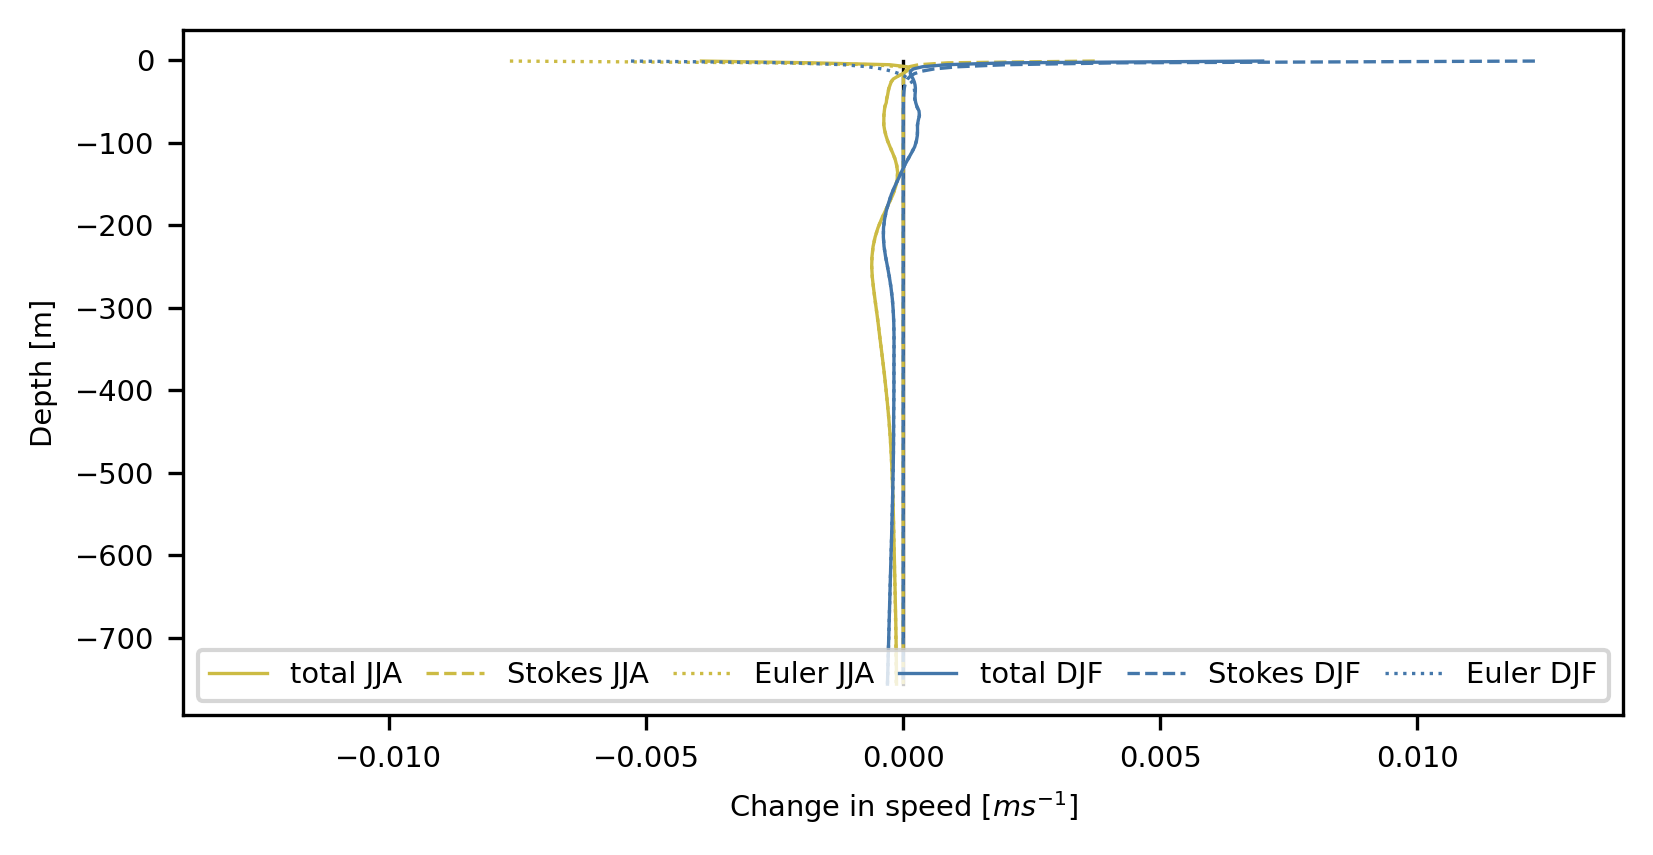

In [23]:
fs='x-small'
fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)

ax = fig.add_subplot(gs[0:3,0:3])
plot_depthprofiles_impact(0,65,0.8)
ax.set_xlim([-0.014,0.014])
ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.set_ylabel('Depth [m]', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=6, fancybox=True, fontsize=fs) 

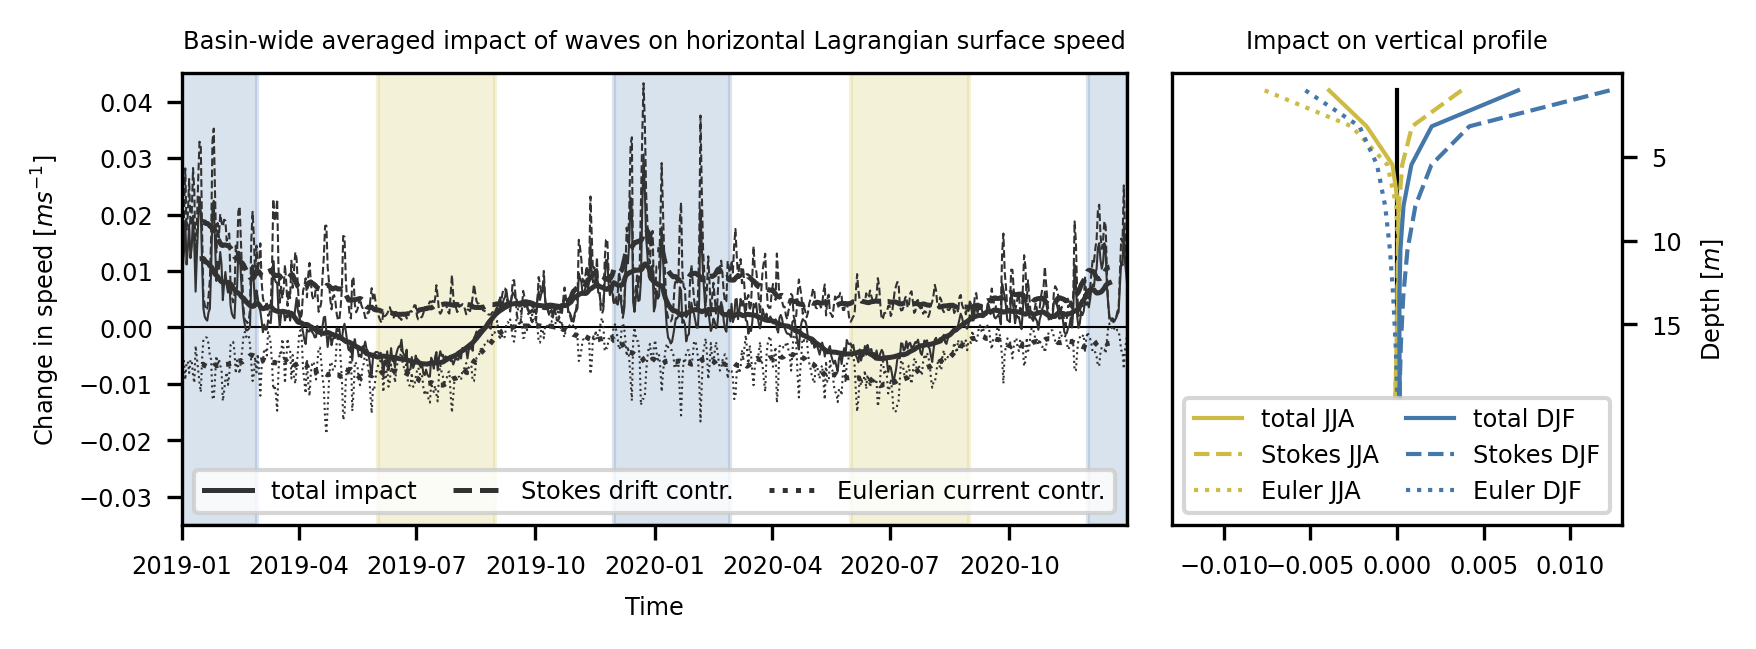

In [24]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
        color=col, linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
        color=col, linewidth=lw3,
        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dotted',linewidth=lw3,
        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('Time', fontsize=fs)
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')     

ax = fig.add_subplot(gs[0:2,2:3])
plot_depthprofiles_impact(0,7,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylim([-27,0])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs) 

#ax = fig.add_subplot(gs[1:2,2:3])
#plot_depthprofiles_impact(7,65,lw2)
#ax.set_xlim([-0.013,0.013])
#ax.tick_params(labelsize=fs)
##ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.set_ylabel('Depth [$km$]', fontsize=fs)
#ax.set_ylim([-4900,-16.5])
#ax.set_yticks([-3500,-2000,-500])
#ax.set_yticklabels(['3.5','2.0','0.5'])
#ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
#ax.legend(loc='lower right', mode='expand', markerscale=0.5,
#          ncol=2, fancybox=True, fontsize=fs) 



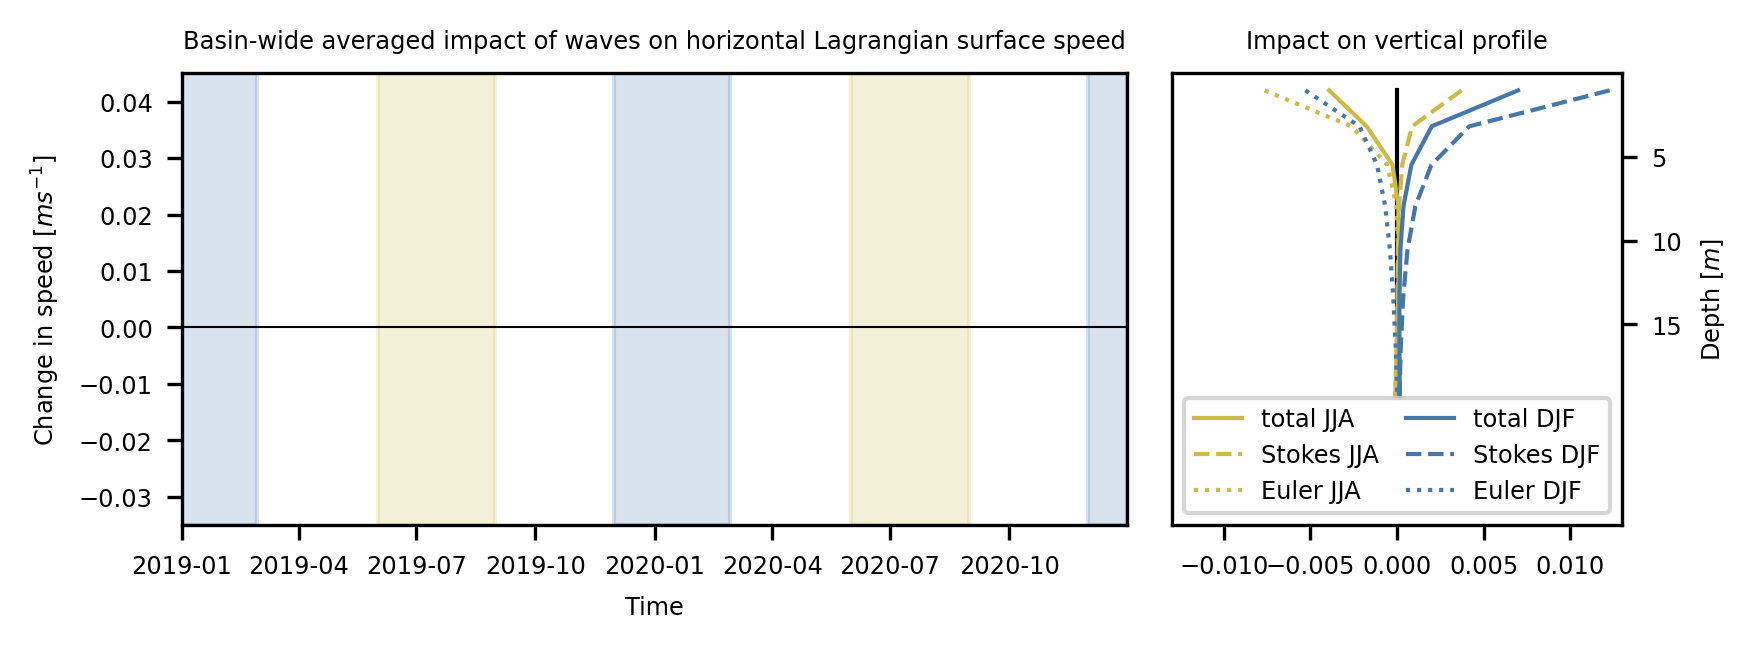

In [30]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
#        color=col, linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
#       color=col, linewidth=lw3,
#        label='total impact')
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
#        color=col, linestyle='dashed', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
#        color=col, linestyle='dashed', linewidth=lw3,
#        label='Stokes drift contr.')
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
#        color=col, linestyle='dotted', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
#        color=col, linestyle='dotted',linewidth=lw3,
#        label='Eulerian current contr.')
#add legend
#ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
#          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('Time', fontsize=fs)
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')     

ax = fig.add_subplot(gs[0:2,2:3])
plot_depthprofiles_impact(0,7,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylim([-27,0])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs) 

#ax = fig.add_subplot(gs[1:2,2:3])
#plot_depthprofiles_impact(7,65,lw2)
#ax.set_xlim([-0.013,0.013])
#ax.tick_params(labelsize=fs)
##ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.set_ylabel('Depth [$km$]', fontsize=fs)
#ax.set_ylim([-4900,-16.5])
#ax.set_yticks([-3500,-2000,-500])
#ax.set_yticklabels(['3.5','2.0','0.5'])
#ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
#ax.legend(loc='lower right', mode='expand', markerscale=0.5,
#          ncol=2, fancybox=True, fontsize=fs) 



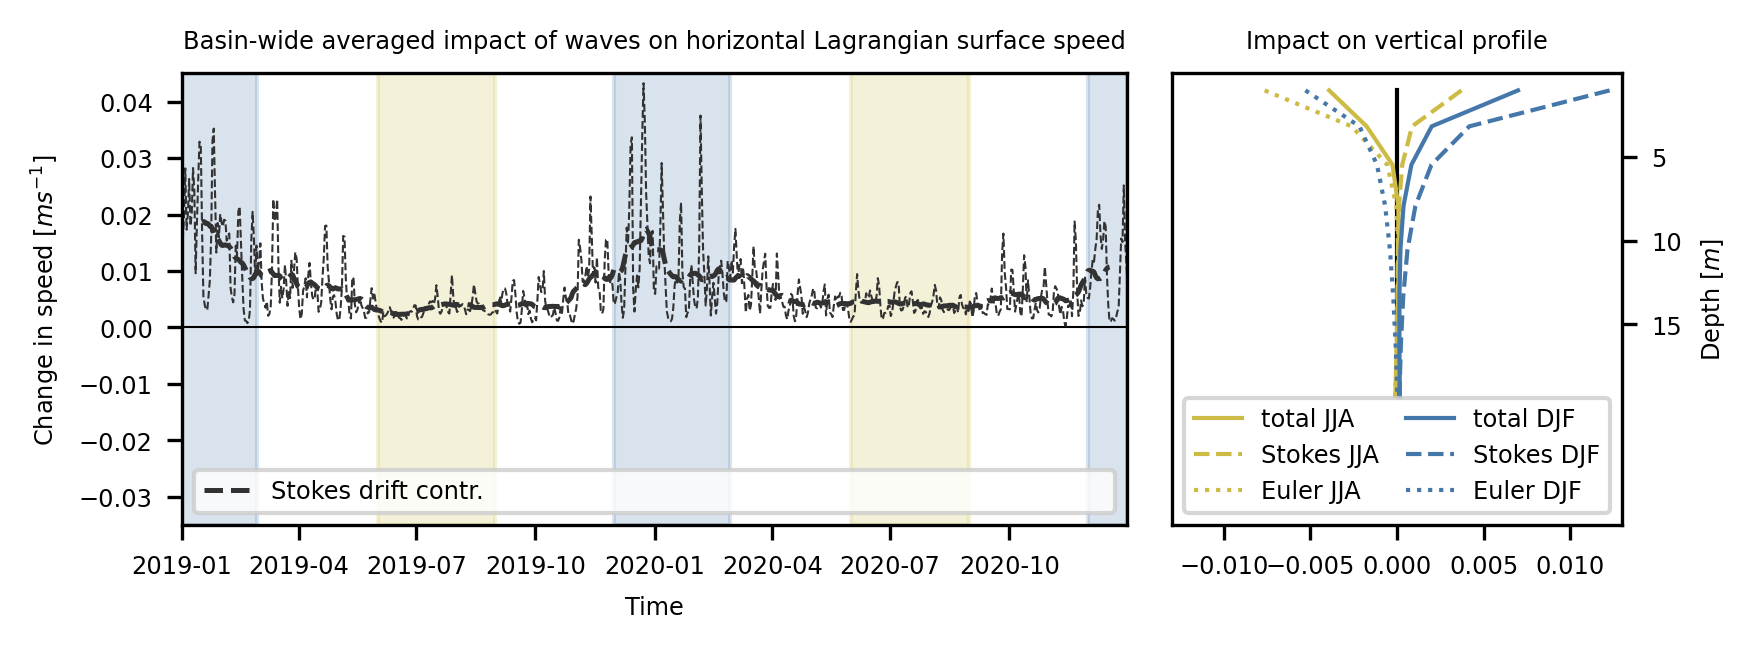

In [26]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
#        color=col, linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
#       color=col, linewidth=lw3,
#        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
#        color=col, linestyle='dotted', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
#        color=col, linestyle='dotted',linewidth=lw3,
#        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('Time', fontsize=fs)
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')     

ax = fig.add_subplot(gs[0:2,2:3])
plot_depthprofiles_impact(0,7,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylim([-27,0])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs) 

#ax = fig.add_subplot(gs[1:2,2:3])
#plot_depthprofiles_impact(7,65,lw2)
#ax.set_xlim([-0.013,0.013])
#ax.tick_params(labelsize=fs)
##ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.set_ylabel('Depth [$km$]', fontsize=fs)
#ax.set_ylim([-4900,-16.5])
#ax.set_yticks([-3500,-2000,-500])
#ax.set_yticklabels(['3.5','2.0','0.5'])
#ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
#ax.legend(loc='lower right', mode='expand', markerscale=0.5,
#          ncol=2, fancybox=True, fontsize=fs) 



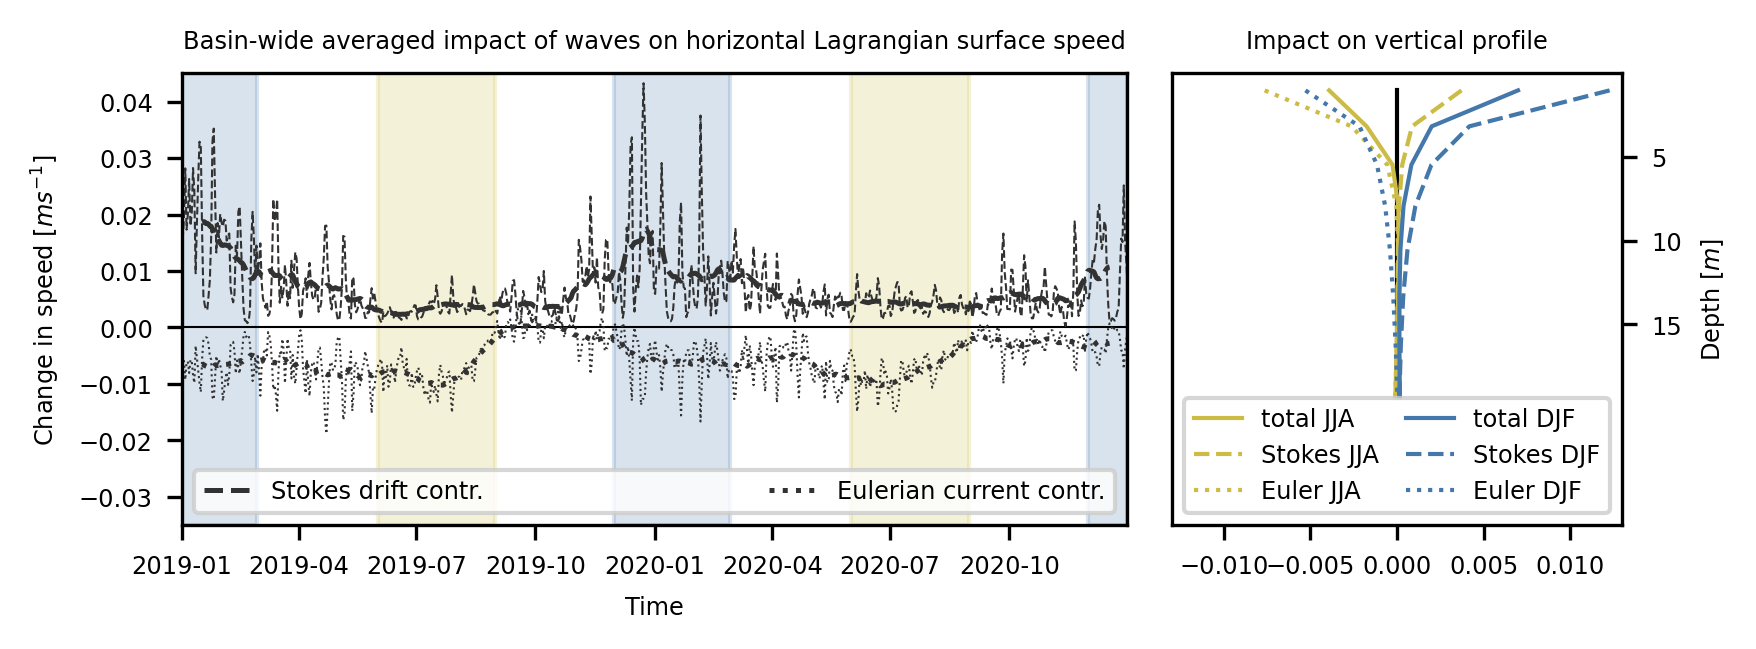

In [27]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
#        color=col, linewidth=lw)
#ax.plot(speed_rsave_imp_al.time_counter,
#        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
#       color=col, linewidth=lw3,
#        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dotted',linewidth=lw3,
        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('Time', fontsize=fs)
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')     

ax = fig.add_subplot(gs[0:2,2:3])
plot_depthprofiles_impact(0,7,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylim([-27,0])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs) 

#ax = fig.add_subplot(gs[1:2,2:3])
#plot_depthprofiles_impact(7,65,lw2)
#ax.set_xlim([-0.013,0.013])
#ax.tick_params(labelsize=fs)
##ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.set_ylabel('Depth [$km$]', fontsize=fs)
#ax.set_ylim([-4900,-16.5])
#ax.set_yticks([-3500,-2000,-500])
#ax.set_yticklabels(['3.5','2.0','0.5'])
#ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
#ax.legend(loc='lower right', mode='expand', markerscale=0.5,
#          ncol=2, fancybox=True, fontsize=fs) 



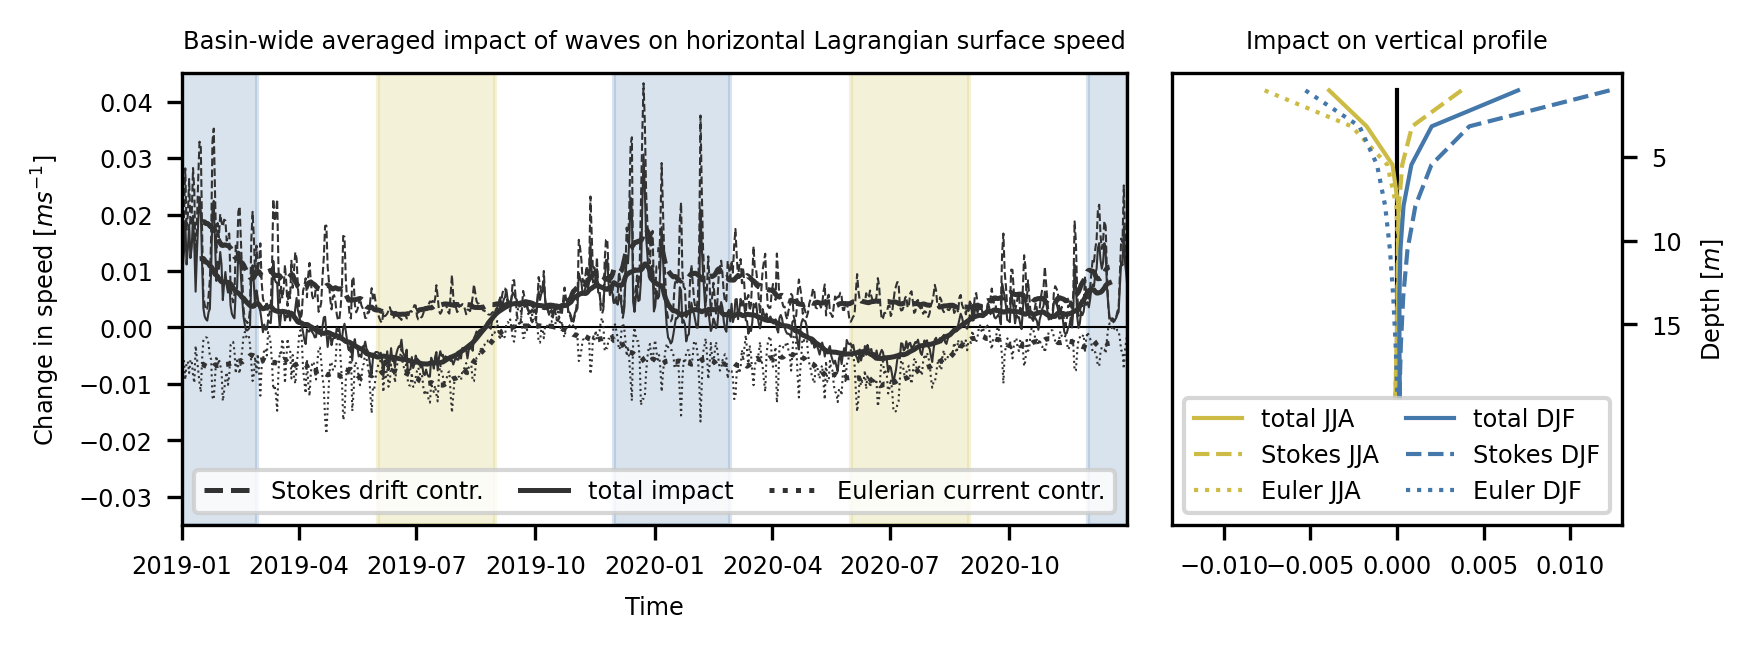

In [28]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
        color=col, linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
       color=col, linewidth=lw3,
        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dotted',linewidth=lw3,
        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('Time', fontsize=fs)
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')     

ax = fig.add_subplot(gs[0:2,2:3])
plot_depthprofiles_impact(0,7,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylim([-27,0])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs) 

#ax = fig.add_subplot(gs[1:2,2:3])
#plot_depthprofiles_impact(7,65,lw2)
#ax.set_xlim([-0.013,0.013])
#ax.tick_params(labelsize=fs)
##ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
#ax.set_ylabel('Depth [$km$]', fontsize=fs)
#ax.set_ylim([-4900,-16.5])
#ax.set_yticks([-3500,-2000,-500])
#ax.set_yticklabels(['3.5','2.0','0.5'])
#ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
#ax.legend(loc='lower right', mode='expand', markerscale=0.5,
#          ncol=2, fancybox=True, fontsize=fs) 



KeyboardInterrupt: 

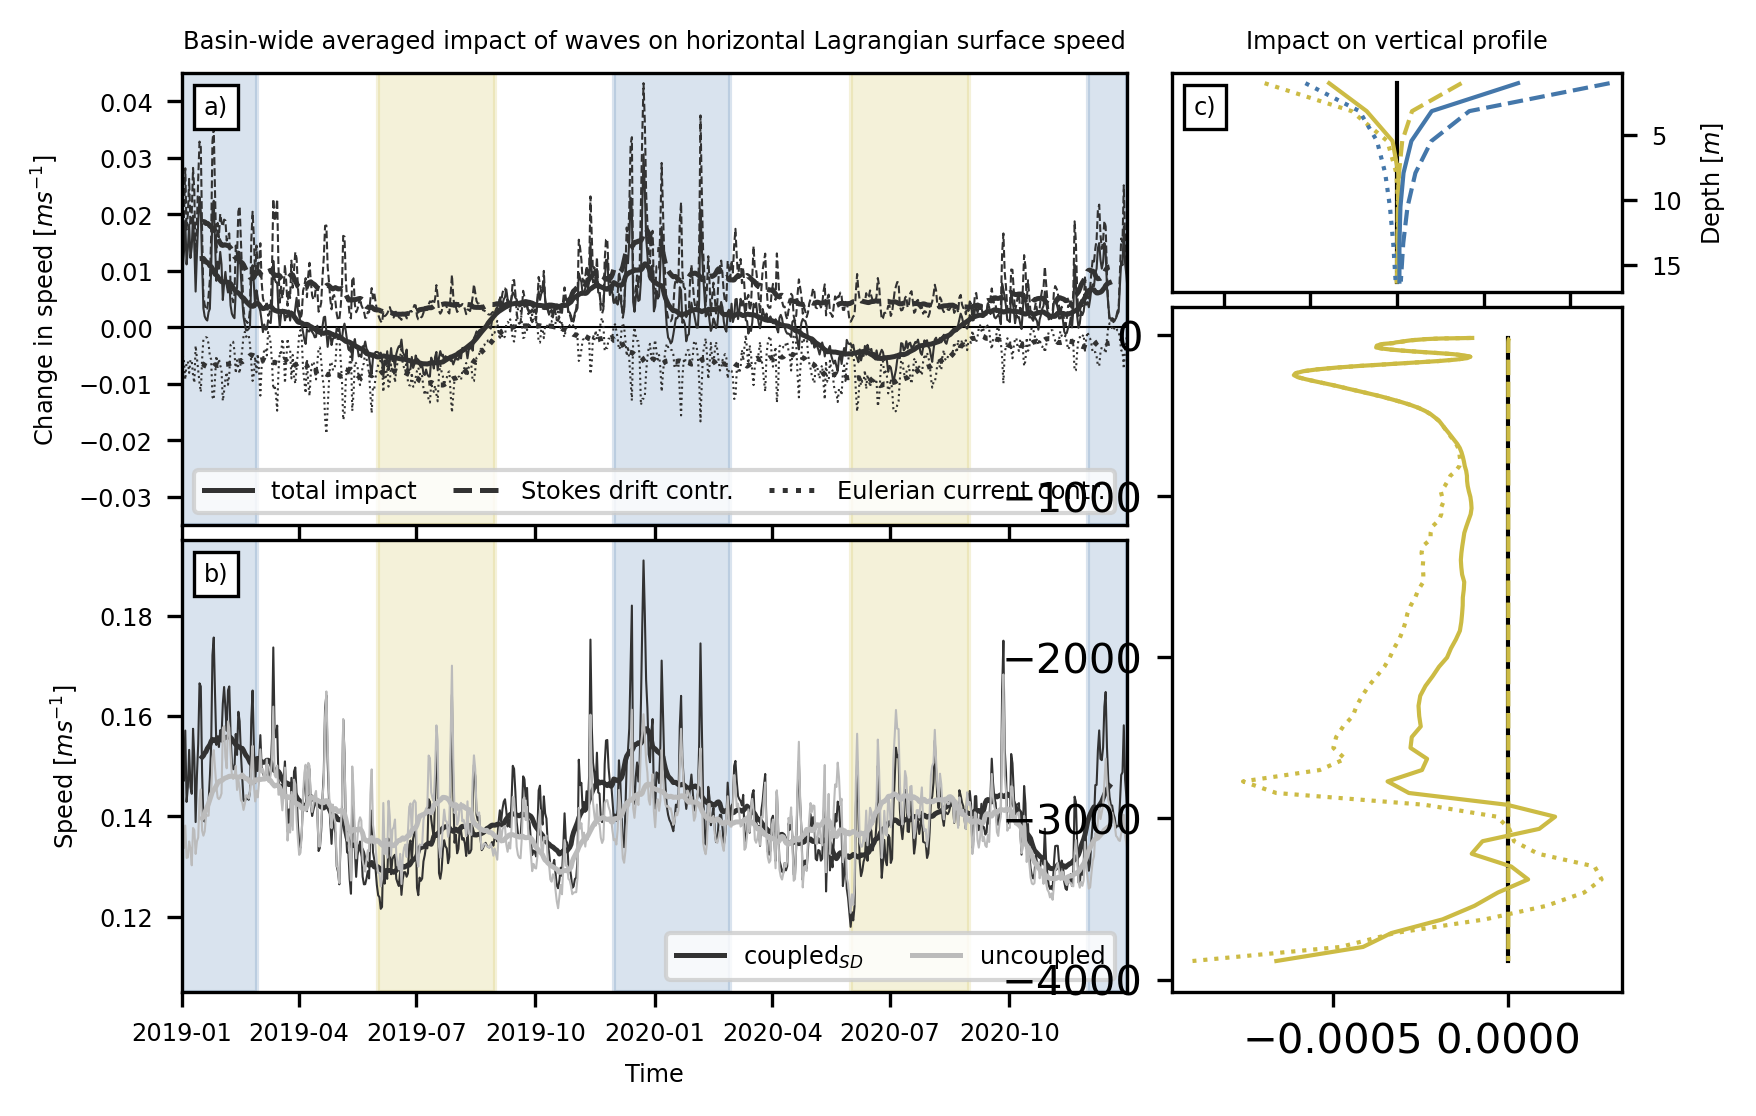

In [25]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
lw_box = 0.8
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
        color=col, linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
        color=col, linewidth=lw3,
        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dotted',linewidth=lw3,
        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xticklabels([])
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')
at = AnchoredText('a)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)

ax = fig.add_subplot(gs[2:4,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.EcSc,
        color=col, linewidth=lw)
ax.plot(speed_rave_ds.time_counter,
        speed_rave_ds.EcSc.rolling(time_counter=30, center=True).mean(),
        color=col, linewidth=lw3,
        label='coupled$_{SD}$')
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.Enc,
        color=col2, linewidth=lw)
ax.plot(speed_rave_ds.time_counter,
        speed_rave_ds.Enc.rolling(time_counter=30, center=True).mean(),
        color=col2, linewidth=lw3,
        label = 'uncoupled')
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin2,ymax2])
ax.set_ylabel('Speed [$ms^{-1}$]', fontsize=fs)
ax.set_xlabel('Time', fontsize=fs)
ax.legend(loc='lower right',
          ncol=2, fancybox=True, fontsize=fs)
at = AnchoredText('b)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)       

ax = fig.add_subplot(gs[0:1,2:3])
plot_depthprofiles_impact(0,6,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
at = AnchoredText('c)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)

ax = fig.add_subplot(gs[1:4,2:3])
plot_depthprofiles_impact(7,122,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('Depth [$km$]', fontsize=fs)
ax.set_ylim([-4900,-16.5])
ax.set_yticks([-3500,-2000,-500])
ax.set_yticklabels(['3.5','2.0','0.5'])
ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs)   

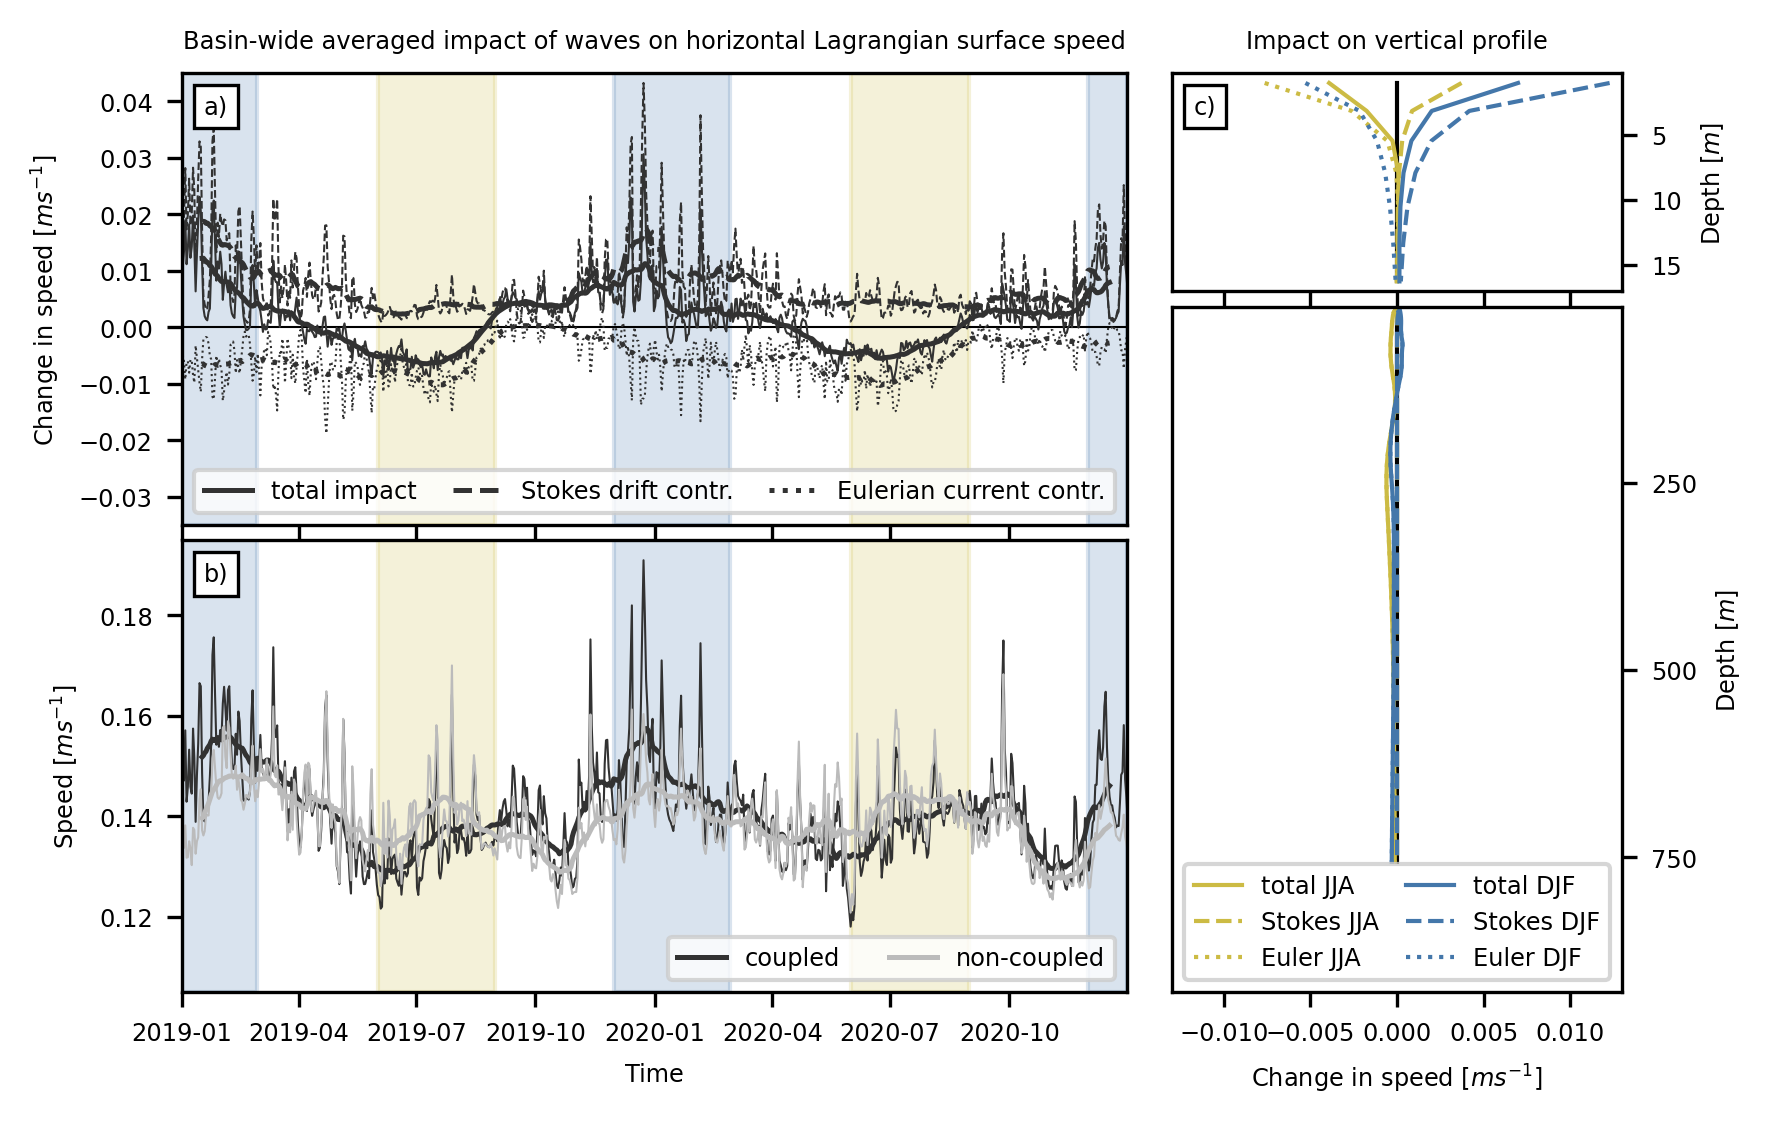

In [ ]:
fs='xx-small'
lw=0.5
lw2=1.0
lw3=1.2
col=col_darkgrey
col2=col_grey
ymin=-0.035
ymax=0.045
ymin2=0.105
ymax2=0.195

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.1, hspace=0.07)

ax = fig.add_subplot(gs[0:2,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin, ymin], [ymax, ymax],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al*0,
        color='k', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_al,
        color=col, linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_al.rolling(time_counter=30, center=True).mean(),
        color=col, linewidth=lw3,
        label='total impact')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_sd,
        color=col, linestyle='dashed', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_sd.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dashed', linewidth=lw3,
        label='Stokes drift contr.')
ax.plot(speed_rsave_imp_al.time_counter, speed_rsave_imp_ec,
        color=col, linestyle='dotted', linewidth=lw)
ax.plot(speed_rsave_imp_al.time_counter,
        speed_rsave_imp_ec.rolling(time_counter=30, center=True).mean(),
        color=col, linestyle='dotted',linewidth=lw3,
        label='Eulerian current contr.')
#add legend
ax.legend(loc='lower center', mode='expand', #bbox_to_anchor=(0.5, 0.9),
          ncol=3, fancybox=True, fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_xticklabels([])
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin,ymax])
ax.set_ylabel('Change in speed [$ms^{-1}$]', fontsize=fs)
ax.set_title('Basin-wide averaged impact of waves on horizontal Lagrangian surface speed',
             fontsize=fs, horizontalalignment='center')
at = AnchoredText('a)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)


ax = fig.add_subplot(gs[2:4,0:2])
ax.fill_between([datetime.date(2019, 1, 1), datetime.date(2019, 2, 28)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 12, 1), datetime.date(2020, 2, 28)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2020, 12, 1), datetime.date(2020, 12, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_blue, alpha=0.2)
ax.fill_between([datetime.date(2019, 6, 1), datetime.date(2019, 8, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_yellow, alpha=0.2)
ax.fill_between([datetime.date(2020, 6, 1), datetime.date(2020, 8, 31)],
                [ymin2, ymin2], [ymax2, ymax2],
                color=col_yellow, alpha=0.2)
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.EcSc,
        color=col, linewidth=lw)
ax.plot(speed_rave_ds.time_counter,
        speed_rave_ds.EcSc.rolling(time_counter=30, center=True).mean(),
        color=col, linewidth=lw3,
        label='coupled')
ax.plot(speed_rave_ds.time_counter,speed_rave_ds.Enc,
        color=col2, linewidth=lw)
ax.plot(speed_rave_ds.time_counter,
        speed_rave_ds.Enc.rolling(time_counter=30, center=True).mean(),
        color=col2, linewidth=lw3,
        label = 'non-coupled')
ax.tick_params(labelsize=fs)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 12, 31)])
ax.set_ylim([ymin2,ymax2])
ax.set_ylabel('Speed [$ms^{-1}$]', fontsize=fs)
ax.set_xlabel('Time', fontsize=fs)
ax.legend(loc='lower right',
          ncol=2, fancybox=True, fontsize=fs)
at = AnchoredText('b)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)       

ax = fig.add_subplot(gs[0:1,2:3])
plot_depthprofiles_impact(0,6,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks([-15,-10,-5])
ax.set_yticklabels(['15','10','5'])
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_title('Impact on vertical profile',
             fontsize=fs, horizontalalignment='center')
at = AnchoredText('c)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at)

ax = fig.add_subplot(gs[1:4,2:3])
plot_depthprofiles_impact(7,65,lw2)
ax.set_xlim([-0.013,0.013])
ax.tick_params(labelsize=fs)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel('Depth [$m$]', fontsize=fs)
ax.set_ylim([-930,-15])
ax.set_yticks([-750, -500, -250])
ax.set_yticklabels(['750','500', '250'])
ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=2, fancybox=True, fontsize=fs)   

In [ ]:
def calc_weightedzave(xyave,zslice):
    zweight_tmp = grid.umask * grid.e1u * grid.e2u * grid.e3u_0
    zweight_tmp2 = zweight_tmp.isel(nav_lev=zslice).sum(dim=('x','y'),skipna=True)/zweight_tmp.isel(nav_lev=zslice).sum(dim=('x','y','nav_lev'),skipna=True)
    zweight = zweight_tmp2.rename({'nav_lev':'z'})
    
    zave = ((xyave.squeeze()
             )*zweight.squeeze()
             ).sum()
    
    return zave.values

In [ ]:
#def calc_weightedzave(xyave,zslice):
#    zweight = grid.e3t_1d.isel(nav_lev=zslice) / grid.e3t_1d.isel(nav_lev=zslice).sum(skipna=True)
#    zweight = zweight.rename({'nav_lev':'z'})
#    
#    zave = ((xyave.squeeze()
#             )*zweight.squeeze()
#             ).sum()
#    
#    return zave.values

In [ ]:
grid.nav_lev.isel(nav_lev=slice(0,25,1))

<xarray.DataArray 'nav_lev' (nav_lev: 25)>
array([  1.018237,   3.165747,   5.464963,   7.920377,  10.536604,  13.318384,
        16.270586,  19.39821 ,  22.706392,  26.2004  ,  29.885643,  33.767673,
        37.852192,  42.14504 ,  46.65221 ,  51.37986 ,  56.334286,  61.521957,
        66.94949 ,  72.62369 ,  78.5515  ,  84.74004 ,  91.19663 ,  97.92873 ,
       104.94398 ], dtype=float32)
Coordinates:
  * nav_lev  (nav_lev) float32 1.018 3.166 5.465 7.92 ... 84.74 91.2 97.93 104.9

In [ ]:
maxz = 7
speed_tsave_imp_ec_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_ec_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))

print('Weighted vertical averages of impacts (zlevels 0 to 6, i.e. upper 16m)')

print('Total impact')
print('winter: ' + str(speed_tsave_imp_al_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_al_xyave_JJA_zmean))

print('Eulerian current contribution')
print('winter: ' + str(speed_tsave_imp_ec_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_ec_xyave_JJA_zmean))

print('Weighted vertical averages of impacts')
print('Stokes drift contribution')
print('winter: ' + str(speed_tsave_imp_sd_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_sd_xyave_JJA_zmean))

Weighted vertical averages of impacts (zlevels 0 to 6, i.e. upper 16m)
Total impact
winter: 0.0013072546466171473
summer: -0.0006778382091881048
Eulerian current contribution
winter: -0.00125403163694543
summer: -0.0012888311160466285
Weighted vertical averages of impacts
Stokes drift contribution
winter: 0.002561286401497066
summer: 0.0006109928527276418


In [ ]:
maxz = 25
speed_tsave_imp_ec_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_ec_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))

print('Weighted vertical averages of impacts (zlevels 0 to 24, i.e. upper 105 m)')

print('Total impact')
print('winter: ' + str(speed_tsave_imp_al_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_al_xyave_JJA_zmean))

print('Eulerian current contribution')
print('winter: ' + str(speed_tsave_imp_ec_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_ec_xyave_JJA_zmean))

print('Weighted vertical averages of impacts')
print('Stokes drift contribution')
print('winter: ' + str(speed_tsave_imp_sd_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_sd_xyave_JJA_zmean))

Weighted vertical averages of impacts (zlevels 0 to 24, i.e. upper 105 m)
Total impact
winter: 0.00043391564991758155
summer: -0.00037341691625797683
Eulerian current contribution
winter: -1.6872296741673304e-05
summer: -0.0004783878062367821
Weighted vertical averages of impacts
Stokes drift contribution
winter: 0.0004507879253162013
summer: 0.00010497084796322039


In [ ]:
maxz = 142
speed_tsave_imp_ec_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_ec_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_ec_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_al_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_al_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_DJF_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='DJF'),
                                                       slice(0,maxz,1))
speed_tsave_imp_sd_xyave_JJA_zmean = calc_weightedzave(speed_tsave_imp_sd_xyave.sel(season='JJA'),
                                                       slice(0,maxz,1))

print('Weighted vertical averages of impacts (all z-levels)')

print('Total impact')
print('winter: ' + str(speed_tsave_imp_al_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_al_xyave_JJA_zmean))

print('Eulerian current contribution')
print('winter: ' + str(speed_tsave_imp_ec_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_ec_xyave_JJA_zmean))

print('Weighted vertical averages of impacts')
print('Stokes drift contribution')
print('winter: ' + str(speed_tsave_imp_sd_xyave_DJF_zmean))
print('summer: ' + str(speed_tsave_imp_sd_xyave_JJA_zmean))


Weighted vertical averages of impacts (all z-levels)
Total impact
winter: -0.0003129452357109375
summer: -0.0001863650890799401
Eulerian current contribution
winter: -0.0003466279687522396
summer: -0.0002631603757458811
Weighted vertical averages of impacts
Stokes drift contribution
winter: 1.9580047928264173e-05
summer: 4.559384188071997e-06


## Recheck horizontal changes at the surfaces

In [ ]:
lonmin_plot = -7
lonmax_plot = 36
latmin_plot = 30.5
latmax_plot = 46
xticks = [0,10,20,30]
yticks = [35,40,45]
xticklabs = ['0° E','10° E','20° E', '30° E']
yticklabs = ['35° N','40° N','45° N']

fs='xx-small'

def calc_reg_ave(var):
    var_rave = var.copy()*0
    var_rave_slim_list = []
    for i in range(17):
        reg = float(i + 1)
        regmask = regionmask.regs.assign_coords({'nav_lon':var.nav_lon, 'nav_lat':var.nav_lat})
        tmp = var.where(regionmask.regs == reg).where(Mask_MedSea_reload.Mask_MedSea == 1).mean(dim=['x','y'], skipna=True)
        tmp2 = (var.where(regionmask.regs == reg).where(Mask_MedSea_reload.Mask_MedSea == 1)*0 + tmp).fillna(0)
        var_rave = var_rave + tmp2
        var_rave_slim_list.append(tmp)
    var_rave_slim = xr.concat(var_rave_slim_list, dim='regs').assign_coords({'regs':np.arange(17)+1})
    return var_rave, var_rave_slim

def plot_bathy():
    var = grid.umaskutil
    var.rename({'x':'lon', 'y':'lat'})
    colors = [(0.5, 0.5, 0.5),(0.5,0.5,0.5)] 
    cmap_name = 'landgrey'
    cmapland = LinearSegmentedColormap.from_list(cmap_name, colors)
    map = plt.pcolor(grid.glamu.isel(time_counter=0), grid.gphiu.isel(time_counter=0),
                     var.where(var!=1).isel(time_counter=0),
                     cmap = cmapland, 
                     shading='nearest')
    
def add_regnumbers():
    ax.text(-3.2,35.8,"1", fontsize=fs)
    ax.text(2.2,37.7,"2", fontsize=fs)
    ax.text(5,41,"3", fontsize=fs)
    ax.text(6.8,38,"4", fontsize=fs)
    ax.text(12,39,"5", fontsize=fs)
    ax.text(10,41.5,"6", fontsize=fs)
    ax.text(12,34.5,"7", fontsize=fs)
    ax.text(18,33.5,"8", fontsize=fs)
    ax.text(18,38,"9", fontsize=fs)
    ax.text(17,41,"10", fontsize=fs)
    ax.text(14.3,43,"11", fontsize=fs)
    ax.text(23,33.5,"12", fontsize=fs)
    ax.text(24,36,"13", fontsize=fs)
    ax.text(29,34,"14", fontsize=fs)
    ax.text(28.5,32,"15", fontsize=fs)
    ax.text(33,33,"16", fontsize=fs)


def build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, xticklabel=True, yticklabel=True, perc=False):
    if perc==False:
        var_tmp = (var1 - var2)
    if perc==True:
        var_tmp = ((var1 - var2)/var2)*100
        mean = var_tmp.mean(dim={'x','y'})
    var, var_slim = calc_reg_ave(var_tmp)
    map = plt.pcolor(var.nav_lon, var.nav_lat,
                     var,
                     cmap=colm, norm=norm,
                     shading='nearest')
    plot_bathy()
    if perc==True:
        if mean < 0:
            ax.text(31,43, '-' + str(np.abs(int(mean.round().values))) + '%', ha='center', fontsize=fs)
        if mean > 0:
            ax.text(31,43, '+' + str(int(mean.round().values)) + '%', ha='center', fontsize=fs)
    ax.set_xlim([lonmin_plot,lonmax_plot])
    ax.set_ylim([latmin_plot,latmax_plot])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabs)
    ax.set_yticklabels(yticklabs)
    if xticklabel==False:
        ax.set_xticklabels([])
    if yticklabel==False:
        ax.set_yticklabels([])
    ax.tick_params(axis='both', labelsize=fs)
    return map,var_slim

def build_subplot_pcolorregspeeddiff2(var1, colm, norm, xticklabel=True, yticklabel=True):
    var_tmp = var1
    var, var_slim = calc_reg_ave(var_tmp)
    map = plt.pcolor(var.nav_lon, var.nav_lat,
                     var,
                     cmap=colm, norm=norm,
                     shading='nearest')
    plot_bathy()
    ax.set_xlim([lonmin_plot,lonmax_plot])
    ax.set_ylim([latmin_plot,latmax_plot])
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklabs)
    ax.set_yticklabels(yticklabs)
    if xticklabel==False:
        ax.set_xticklabels([])
    if yticklabel==False:
        ax.set_yticklabels([])
    ax.tick_params(axis='both', labelsize=fs)
    return map,var_slim

def build_subplot_regstats(Tot_ann,Tot_jja,Tot_djf,Sto_ann,Sto_jja,Sto_djf,Eul_ann,Eul_jja,Eul_djf):
    col_jja = col_yellow_alpha #'khaki'
    col_jja2 = col_yellow #'darkkhaki'
    col_djf = col_blue_alpha #'lightgrey'
    col_djf2 = col_blue
    sym_eul = 's'
    sym_sto = '^'
    msize = 2
    bwidth = 0.15
    ax.bar(Tot_ann.isel(regs=np.arange(0,16,1)).regs, Tot_ann.isel(regs=np.arange(0,16,1)), color = col_black_alpha, width = bwidth, label='total Annual')
    ax.bar(Tot_jja.isel(regs=np.arange(0,16,1)).regs-bwidth, Tot_jja.isel(regs=np.arange(0,16,1)), color = col_jja, width = bwidth, label='total Summer')
    ax.bar(Tot_djf.isel(regs=np.arange(0,16,1)).regs+bwidth, Tot_djf.isel(regs=np.arange(0,16,1)), color = col_djf, width = bwidth, label='total Winter')
    ax.scatter(Sto_ann.isel(regs=np.arange(0,16,1)).regs, Sto_ann.isel(regs=np.arange(0,16,1)), color = 'k', marker=sym_sto, s=msize, label='Stokes Annual')
    ax.scatter(Sto_jja.isel(regs=np.arange(0,16,1)).regs-bwidth, Sto_jja.isel(regs=np.arange(0,16,1)), color = col_jja2, marker=sym_sto, s=msize, label='Stokes Summer')
    ax.scatter(Sto_djf.isel(regs=np.arange(0,16,1)).regs+bwidth, Sto_djf.isel(regs=np.arange(0,16,1)), color = col_djf2, marker=sym_sto, s=msize, label='Stokes Winter')
    ax.scatter(Eul_ann.isel(regs=np.arange(0,16,1)).regs, Eul_ann.isel(regs=np.arange(0,16,1)), color = 'k', marker=sym_eul, s=msize, label='Euler Annual')
    ax.scatter(Eul_jja.isel(regs=np.arange(0,16,1)).regs-bwidth, Eul_jja.isel(regs=np.arange(0,16,1)), color = col_jja2, marker=sym_eul, s=msize, label='Euler Summer')
    ax.scatter(Eul_djf.isel(regs=np.arange(0,16,1)).regs+bwidth, Eul_djf.isel(regs=np.arange(0,16,1)), color = col_djf2, marker=sym_eul, s=msize, label='Euler Winter')
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=fs)
    ax.set_xlim([0,17])
    ax.plot([0,17],[0,0], color='k', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=fs)
    ax.set_xticks(np.arange(1,17))



/tmp/ipykernel_11165/1028711614.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  map = plt.pcolor(var.nav_lon, var.nav_lat,
/tmp/ipykernel_11165/1028711614.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  map = plt.pcolor(var.nav_lon, var.nav_lat,
/tmp/ipykernel_11165/1028711614.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  map = plt.pcolor(var.nav_lon, var.nav_lat,
/tmp/ipykernel_11165/1

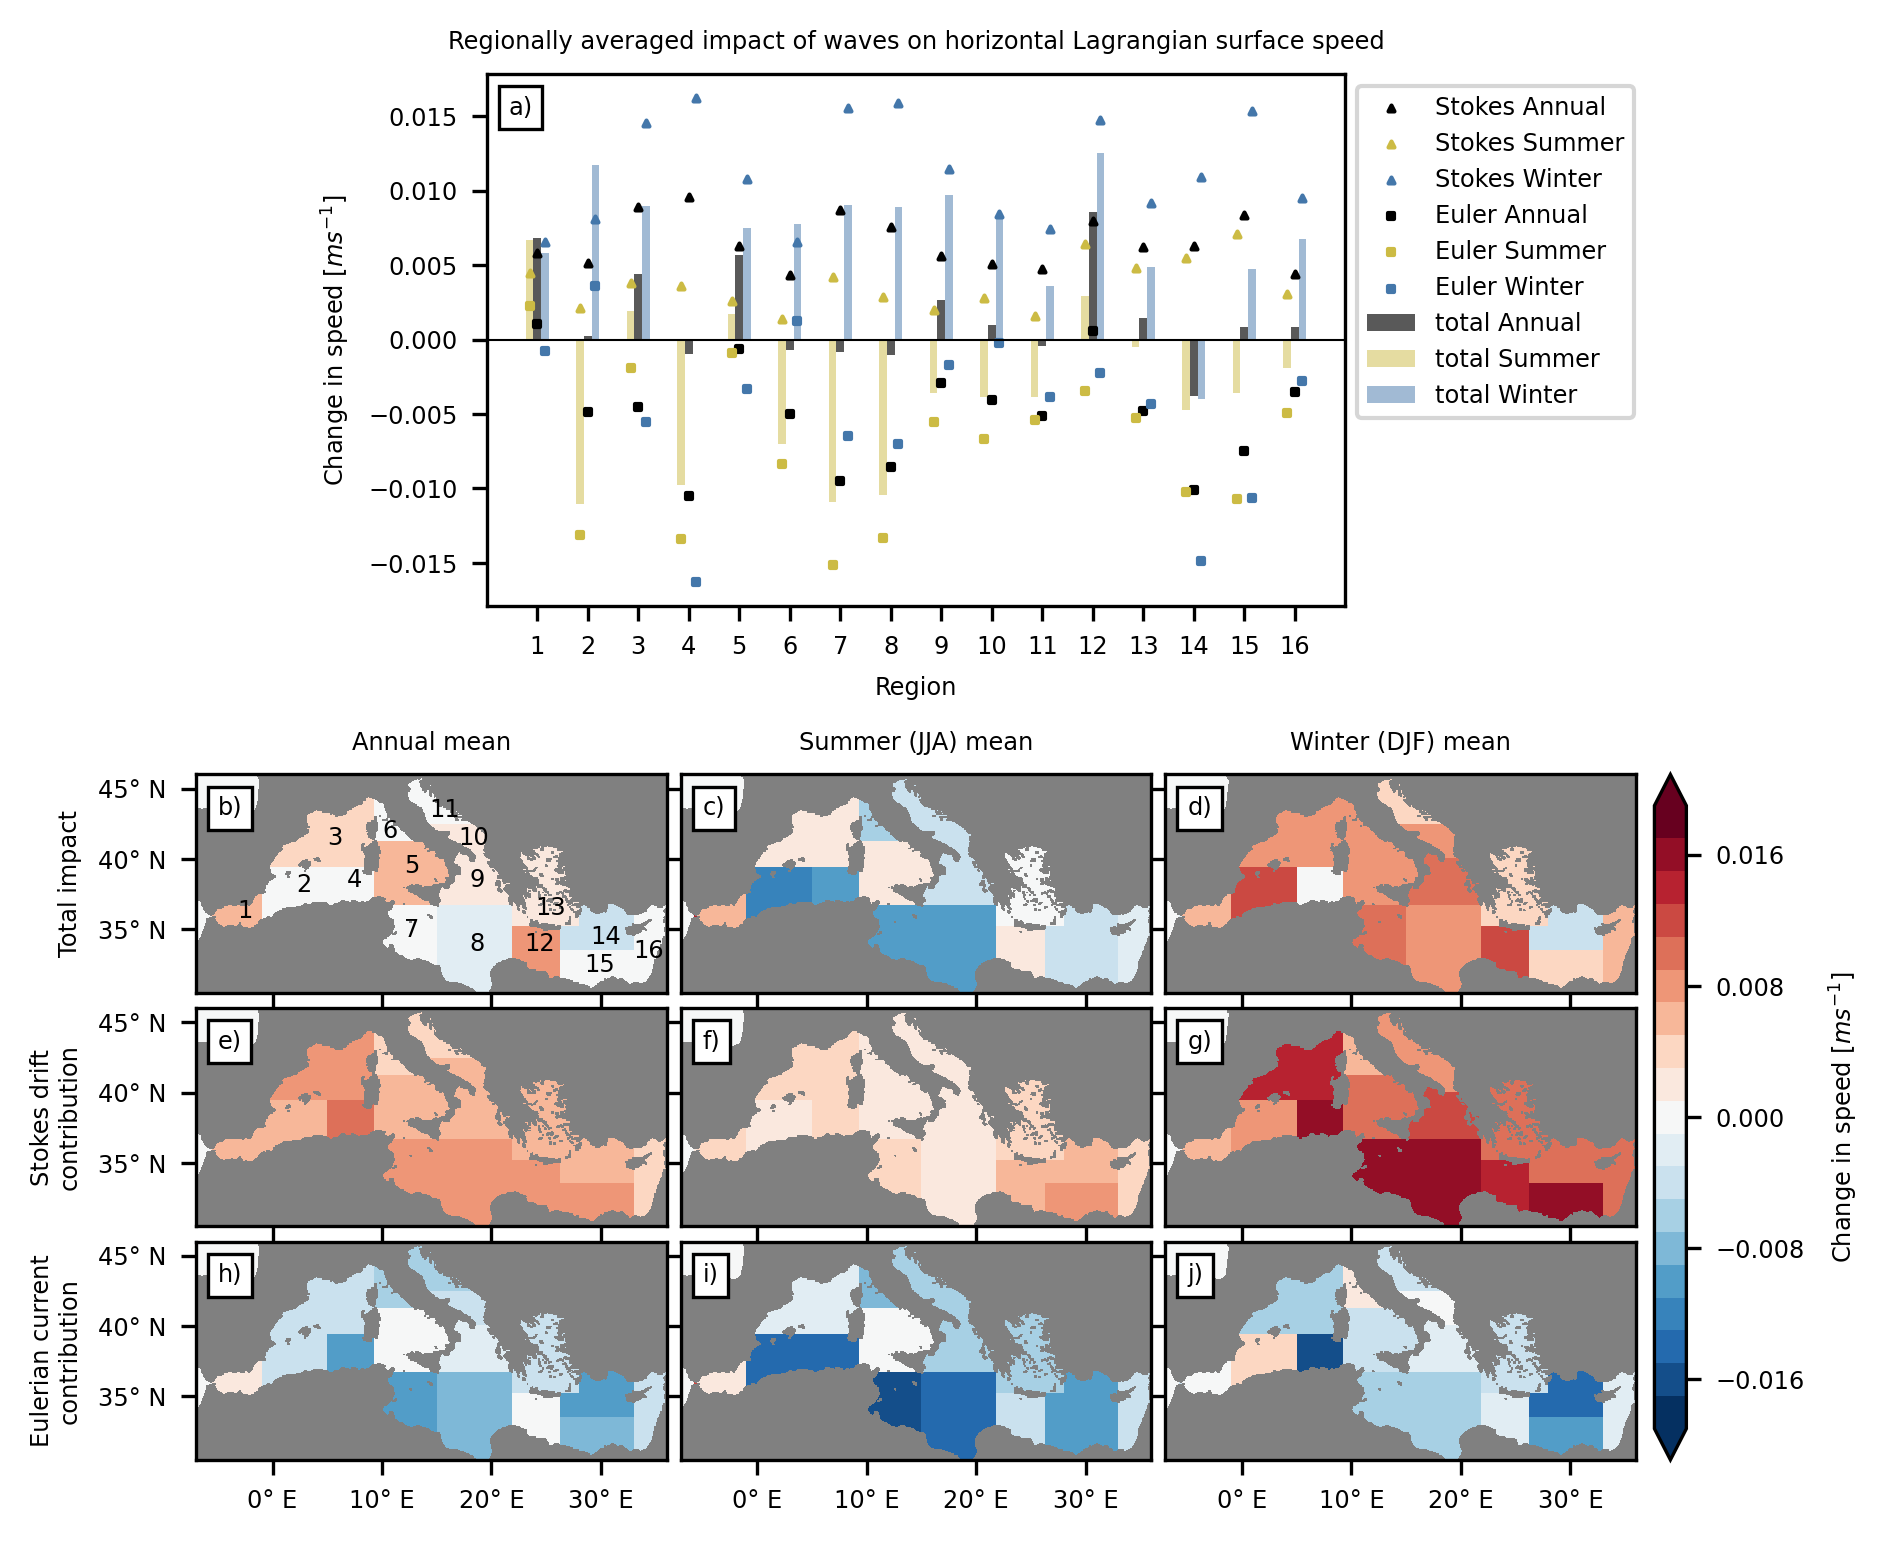

In [ ]:
# Impact of waves on speed (regionally averaged) 


nctic = 5
zlev = 0

colm = cm.RdBu_r 
levs = np.arange(-0.02, 0.02, 0.002)
norm = colors.BoundaryNorm(boundaries=levs+0.002/2, ncolors=colm.N)
ncticks = [-0.016, -0.008, 0, 0.008, 0.016]

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)
gs2 = fig.add_gridspec(nrows=5, ncols=5, 
                      left=0.1, right=0.9,
                      wspace=0.05, hspace=0.15)
gscbar = fig.add_gridspec(nrows=6, ncols=100, 
                          left=0.1, right=1.0,
                          wspace=0.03, hspace=0.07)

## Eulerian impact
### annual mean
ax = fig.add_subplot(gs[5,0])
var1 = speed_tave_ds.isel(z=zlev).EcProjEcSc
var2 = speed_tave_ds.isel(z=zlev).Enc
map,Eul_ann = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm)
cbaxes = fig.add_subplot(gscbar[3:6,90:92])
cbar = plt.colorbar(map, cax = cbaxes, ticks=ncticks,
                    orientation='vertical', extend='both')
cbar.ax.tick_params(labelsize=fs)
cbar.minorticks_off()
ax.set_ylabel('Eulerian current\ncontribution', fontsize=fs)
at = AnchoredText('h)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### summer mean
ax = fig.add_subplot(gs[5,1])
var1 = speed_tsave_ds.sel(season='JJA').isel(z=zlev).EcProjEcSc
var2 = speed_tsave_ds.sel(season='JJA').isel(z=zlev).Enc
map,Eul_jja = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, yticklabel=False)
at = AnchoredText('i)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### winter mean
ax = fig.add_subplot(gs[5,2])
var1 = speed_tsave_ds.sel(season='DJF').isel(z=zlev).EcProjEcSc
var2 = speed_tsave_ds.sel(season='DJF').isel(z=zlev).Enc
map, Eul_djf = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, yticklabel=False)
at = AnchoredText('j)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 

## Stokes drift impact
### annual mean
ax = fig.add_subplot(gs[4,0])
var1 = speed_tave_ds.isel(z=zlev).ScProjEcSc
map, Sto_ann = build_subplot_pcolorregspeeddiff2(var1, colm, norm, xticklabel=False)
ax.set_ylabel('Stokes drift\ncontribution', fontsize=fs)
at = AnchoredText('e)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### summer mean
ax = fig.add_subplot(gs[4,1])
var1 = speed_tsave_ds.sel(season='JJA').isel(z=zlev).ScProjEcSc
map, Sto_jja = build_subplot_pcolorregspeeddiff2(var1, colm, norm, yticklabel=False, xticklabel=False)
at = AnchoredText('f)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### winter mean
ax = fig.add_subplot(gs[4,2])
var1 = speed_tsave_ds.sel(season='DJF').isel(z=zlev).ScProjEcSc
map, Sto_djf = build_subplot_pcolorregspeeddiff2(var1, colm, norm, yticklabel=False, xticklabel=False)
ax.text(55,latmin_plot+(latmax_plot-latmin_plot)/2, 'Change in speed [$m s^{-1}$]', 
        fontsize=fs, horizontalalignment='center', verticalalignment='center', rotation=90)
at = AnchoredText('g)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 

## Total impact
### annual mean
ax = fig.add_subplot(gs[3,0])
var1 = speed_tave_ds.isel(z=zlev).EcSc
var2 = speed_tave_ds.isel(z=zlev).Enc
map, Tot_ann = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, xticklabel=False)
ax.set_ylabel('Total impact', fontsize=fs)
ax.set_title('Annual mean', fontsize=fs)
add_regnumbers()
at = AnchoredText('b)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### summer mean
ax = fig.add_subplot(gs[3,1])
var1 = speed_tsave_ds.sel(season='JJA').isel(z=zlev).EcSc
var2 = speed_tsave_ds.sel(season='JJA').isel(z=zlev).Enc
map, Tot_jja = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, yticklabel=False, xticklabel=False)
ax.set_title('Summer (JJA) mean', fontsize=fs)
at = AnchoredText('c)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 
### winter mean
ax = fig.add_subplot(gs[3,2])
var1 = speed_tsave_ds.sel(season='DJF').isel(z=zlev).EcSc
var2 = speed_tsave_ds.sel(season='DJF').isel(z=zlev).Enc
map, Tot_djf = build_subplot_pcolorregspeeddiff(var1, var2, colm, norm, yticklabel=False, xticklabel=False)
ax.set_title('Winter (DJF) mean', fontsize=fs)
at = AnchoredText('d)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 

## Overall region statistics
ax = fig.add_subplot(gs2[0:2,1:4])
build_subplot_regstats(Tot_ann,Tot_jja,Tot_djf,Sto_ann,Sto_jja,Sto_djf,Eul_ann,Eul_jja,Eul_djf)
ax.set_xlabel('Region', fontsize=fs)
ax.set_ylabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.set_title('Regionally averaged impact of waves on horizontal Lagrangian surface speed', fontsize=fs)
at = AnchoredText('a)', prop=dict(size=fs), frameon=True, loc='upper left')
at.patch.set_linewidth(lw_box)
ax.add_artist(at) 


## Find explanations for spatio-temporal variability of wave-driven Eulerian currents: check relation to MLD and wind stress

In [46]:
datapath = '/storage/shared/oceanparcels/input_data/NEMO4p2_CMCC/'
datapath_nc = datapath + 'MedMFS24_IMMERSE-NEMOv4p2_uncoupled_fulldepth/'
datapath_c = datapath + 'MedMFS24_IMMERSE-NEMOv4p2_coupled_fulldepth/'

list_tgrid_nc = sorted(glob(datapath_nc + 'MED24_OBC_1d*_grid_T.nc'))
list_tgrid_c = sorted(glob(datapath_c + 'MED24_OBC_1d*_grid_T.nc'))

# uncoupled experiment contains data from 2018 to 2020, coupled only 2019 to 2020
# -> need to restrict uncoupled one to period of coupled one
tvars_nc = xr.open_mfdataset(list_tgrid_nc[365:], combine='by_coords')
tvars_c = xr.open_mfdataset(list_tgrid_c, combine='by_coords')

In [47]:
mld_nc = tvars_nc.somxl010.where(Mask_MedSea_reload.Mask_MedSea == 1).assign_coords(coords={('nav_lon'):tvars_nc.nav_lon, ('nav_lat'):tvars_nc.nav_lat})
mld_c = tvars_c.somxl010.where(Mask_MedSea_reload.Mask_MedSea == 1).assign_coords(coords={('nav_lon'):tvars_nc.nav_lon, ('nav_lat'):tvars_nc.nav_lat})

In [48]:
mld_tave_nc = mld_nc.where(mld_nc !=0).mean(dim='time_counter').compute()
mld_tave_c = mld_c.where(mld_c !=0).mean(dim='time_counter').compute()

In [49]:
mld_tsave_nc = mld_nc.where(mld_nc !=0).groupby('time_counter.season').mean(dim='time_counter').compute()
mld_tsave_c = mld_c.where(mld_c !=0).groupby('time_counter.season').mean(dim='time_counter').compute()

In [50]:
mld_tsave_MSave_nc = mld_tsave_nc.mean(dim={'x','y'}).compute()
mld_tsave_MSave_c = mld_tsave_c.mean(dim={'x','y'}).compute()
mld_tsave_MSstd_nc = mld_tsave_nc.std(dim={'x','y'}).compute()
mld_tsave_MSstd_c = mld_tsave_c.std(dim={'x','y'}).compute()

In [51]:
mld_tsave_MSstd_c

<xarray.DataArray 'somxl010' (season: 4)>
array([24.575016 ,  1.4091522,  9.455195 ,  5.760479 ], dtype=float32)
Coordinates:
    z        float32 1.018
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [52]:
mld_tsave_MSave_c

<xarray.DataArray 'somxl010' (season: 4)>
array([70.64826 , 13.143343, 29.743212, 29.598333], dtype=float32)
Coordinates:
    z        float32 1.018
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [53]:
mld_tsave_MSave_nc

<xarray.DataArray 'somxl010' (season: 4)>
array([67.03621 , 13.403976, 30.879484, 30.525501], dtype=float32)
Coordinates:
    z        float32 1.018
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

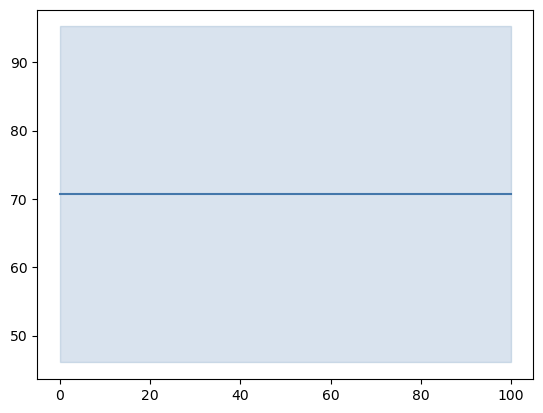

In [54]:
vary_mean = mld_tsave_MSave_c.sel(season='DJF')
vary_std = mld_tsave_MSstd_c.sel(season='DJF')
plt.fill_between([0, 100],[vary_mean-vary_std, vary_mean-vary_std], [vary_mean+vary_std, vary_mean+vary_std],
                 color=col_blue, alpha=0.2)
plt.plot([0, 100],[vary_mean, vary_mean], color=col_blue, label='coupled')

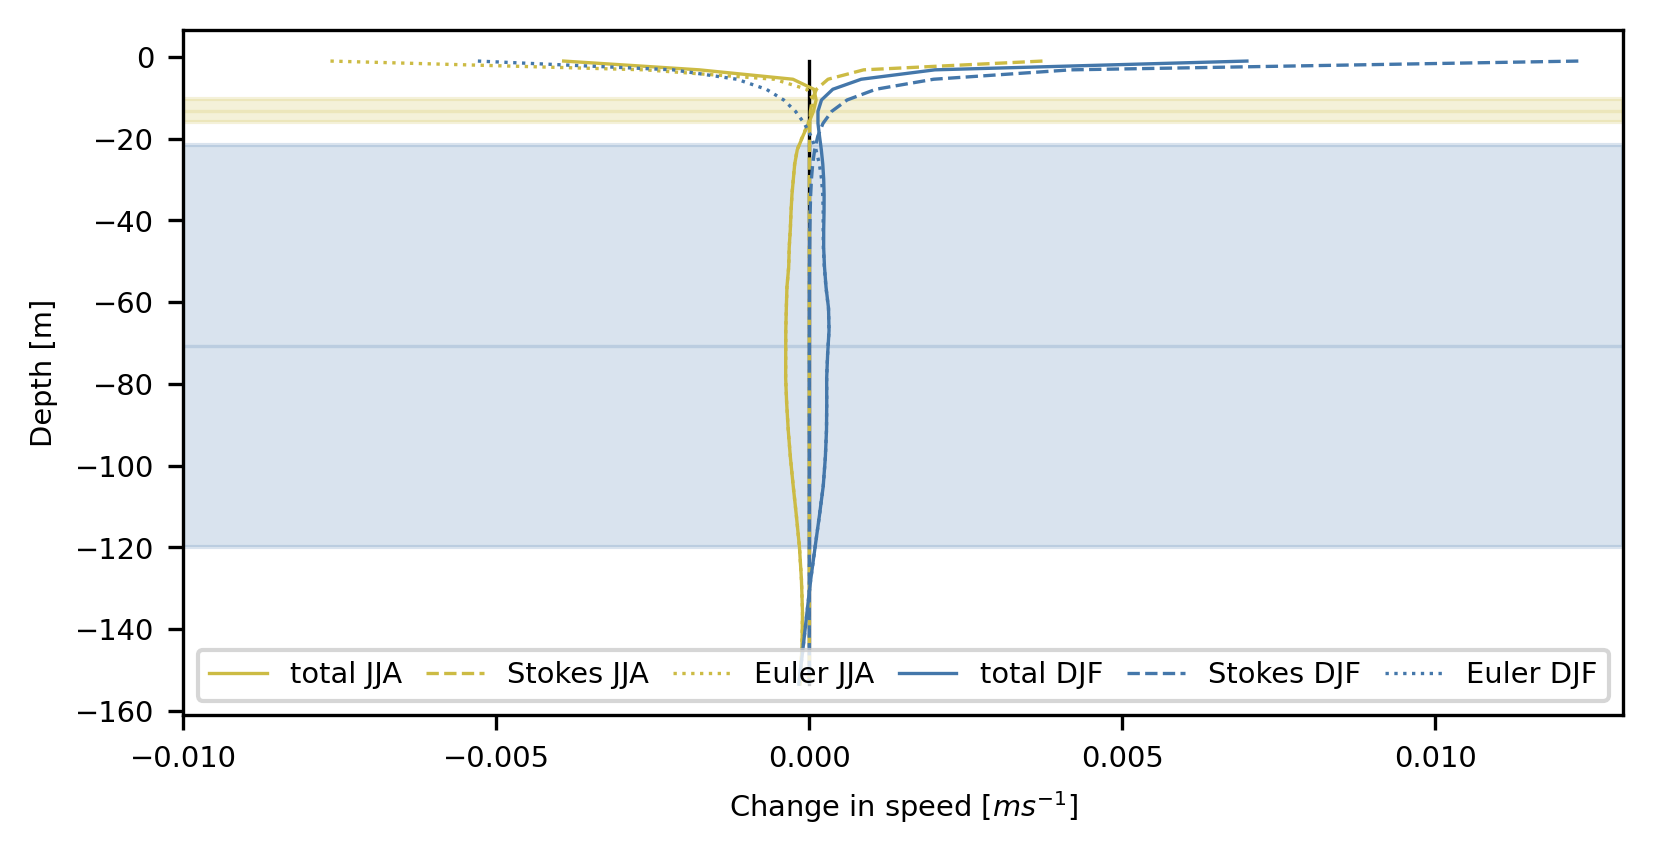

In [55]:
fs='x-small'
xmin=-0.01
xmax=0.013
vary_mean = -mld_tsave_MSave_c.sel(season='DJF')
vary_std = -2*mld_tsave_MSstd_c.sel(season='DJF')
vary_mean_2 = -mld_tsave_MSave_c.sel(season='JJA')
vary_std_2 = -2*mld_tsave_MSstd_c.sel(season='JJA')

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)

ax = fig.add_subplot(gs[0:3,0:3])
ax.fill_between([xmin, xmax],[vary_mean-vary_std, vary_mean-vary_std], [vary_mean+vary_std, vary_mean+vary_std],
                 color=col_blue, alpha=0.2)
ax.plot([xmin, xmax],[vary_mean, vary_mean],
        color=col_blue, alpha = 0.2, linewidth=0.8)
ax.fill_between([xmin, xmax],[vary_mean_2-vary_std_2, vary_mean_2-vary_std_2], [vary_mean_2+vary_std_2, vary_mean_2+vary_std_2],
                 color=col_yellow, alpha=0.2)
ax.plot([xmin, xmax],[vary_mean_2, vary_mean_2],
        color=col_yellow, alpha = 0.2, linewidth=0.8)
plot_depthprofiles_impact(0,30,0.8)
ax.set_xlim([xmin,xmax])
ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.set_ylabel('Depth [m]', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=6, fancybox=True, fontsize=fs) 

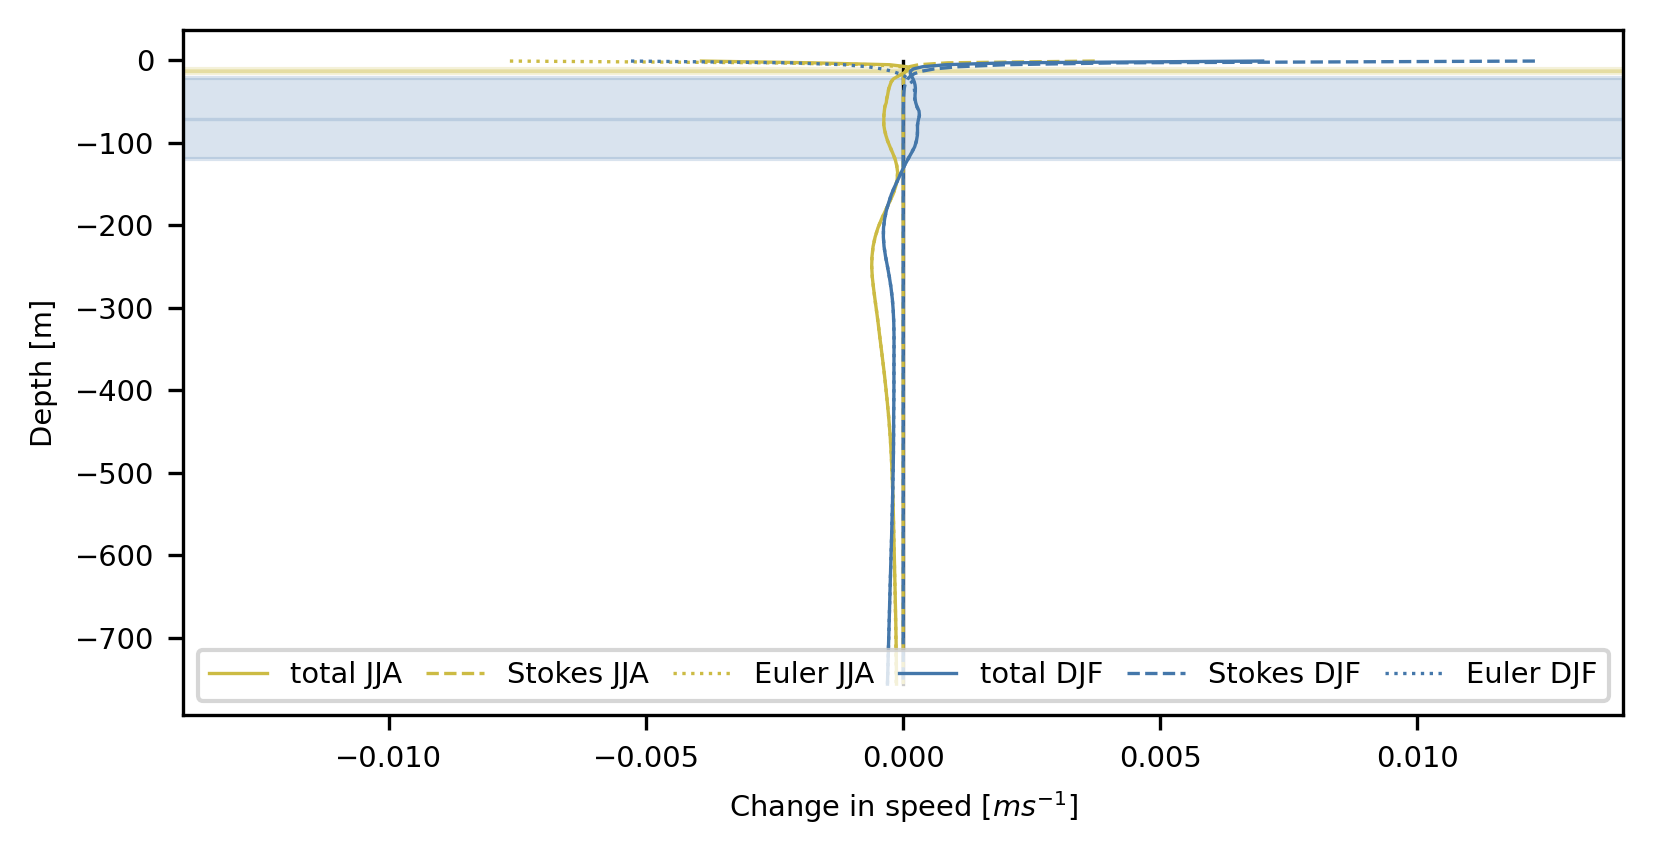

In [56]:
fs='x-small'
xmin=-0.014
xmax=0.014
vary_mean = -mld_tsave_MSave_c.sel(season='DJF')
vary_std = -2*mld_tsave_MSstd_c.sel(season='DJF')
vary_mean_2 = -mld_tsave_MSave_c.sel(season='JJA')
vary_std_2 = -2*mld_tsave_MSstd_c.sel(season='JJA')

fig = plt.figure(figsize=(6,6), dpi=300, constrained_layout=False)
gs = fig.add_gridspec(nrows=6, ncols=3, 
                      left=0.1, right=0.9,
                      wspace=0.03, hspace=0.07)

ax = fig.add_subplot(gs[0:3,0:3])
ax.fill_between([xmin, xmax],[vary_mean-vary_std, vary_mean-vary_std], [vary_mean+vary_std, vary_mean+vary_std],
                 color=col_blue, alpha=0.2)
ax.plot([xmin, xmax],[vary_mean, vary_mean],
        color=col_blue, alpha = 0.2, linewidth=0.8)
ax.fill_between([xmin, xmax],[vary_mean_2-vary_std_2, vary_mean_2-vary_std_2], [vary_mean_2+vary_std_2, vary_mean_2+vary_std_2],
                 color=col_yellow, alpha=0.2)
ax.plot([xmin, xmax],[vary_mean_2, vary_mean_2],
        color=col_yellow, alpha = 0.2, linewidth=0.8)
plot_depthprofiles_impact(0,65,0.8)
ax.set_xlim([xmin,xmax])
ax.set_xlabel('Change in speed [$m s^{-1}$]', fontsize=fs)
ax.set_ylabel('Depth [m]', fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(loc='lower right', mode='expand', markerscale=0.5,
          ncol=6, fancybox=True, fontsize=fs) 

In [57]:
mld_tave_diff = mld_tave_c - mld_tave_nc
mld_tsave_diff = mld_tsave_c - mld_tsave_nc

In [58]:
mld_tsave_diff

<xarray.DataArray 'somxl010' (season: 4, y: 380, x: 1307)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 30.19 30.19 30.19 30.19 ... -1.0 -1.0 -1.0 -1.0
    z        float32 1.018
    nav_lon  (y, x) float32 -18.12 -18.08 -18.04 -18.0 ... -1.0 -1.0 -1.0 -1.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: y, x

In [59]:
mld_tsave_c_rave, mld_tsave_c_rave_slim = calc_reg_ave(mld_tsave_c)
mld_tave_c_rave, mld_tave_c_rave_slim = calc_reg_ave(mld_tave_nc)

mld_tsave_diff_rave, mld_tsave_diff_rave_slim = calc_reg_ave(mld_tsave_diff)
mld_tave_diff_rave, mld_tave_diff_rave_slim = calc_reg_ave(mld_tave_diff)


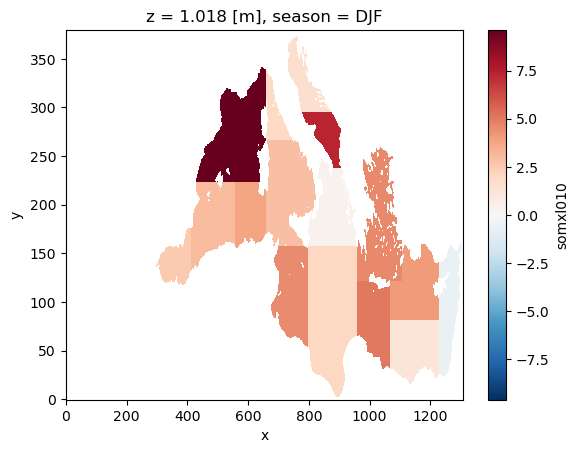

In [60]:
mld_tsave_diff_rave.sel(season='DJF').plot()

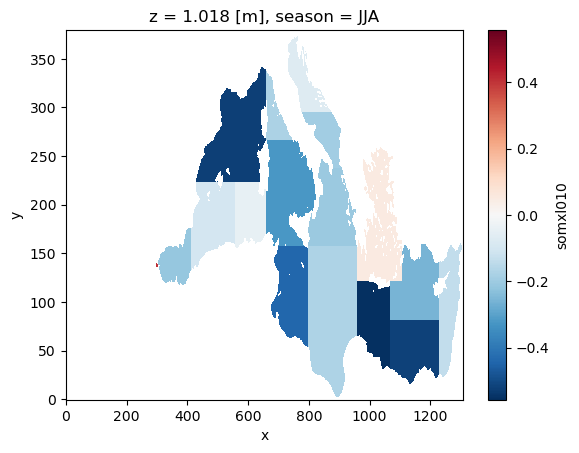

In [61]:
mld_tsave_diff_rave.sel(season='JJA').plot()

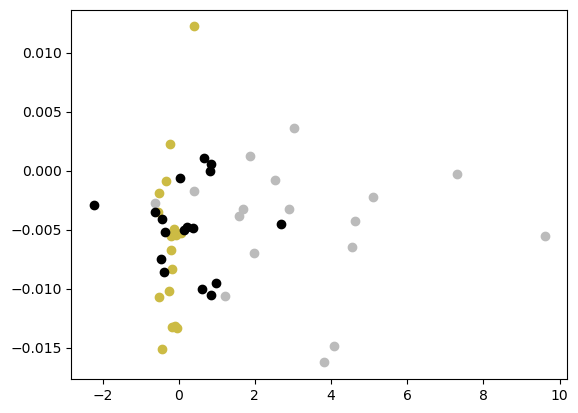

In [78]:
#Tot_ann,Tot_jja,Tot_djf,Sto_ann,Sto_jja,Sto_djf,Eul_ann,Eul_jja,Eul_djf

plt.scatter(mld_tsave_diff_rave_slim.sel(season='JJA'),Eul_jja, color=col_yellow)
plt.scatter(mld_tsave_diff_rave_slim.sel(season='DJF'),Eul_djf, color=col_grey)
plt.scatter(mld_tave_diff_rave_slim,Eul_ann, color='k')

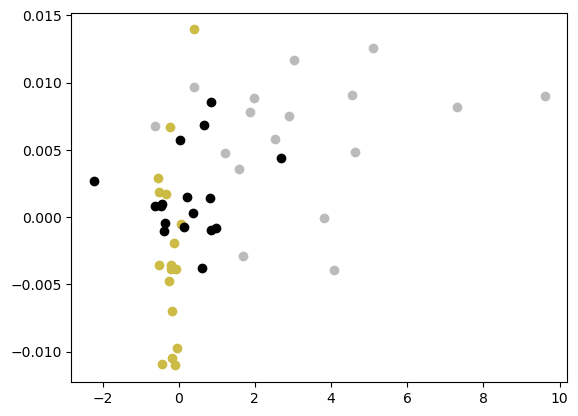

In [79]:
plt.scatter(mld_tsave_diff_rave_slim.sel(season='JJA'),Tot_jja, color=col_yellow)
plt.scatter(mld_tsave_diff_rave_slim.sel(season='DJF'),Tot_djf, color=col_grey)
plt.scatter(mld_tave_diff_rave_slim,Tot_ann, color='k')

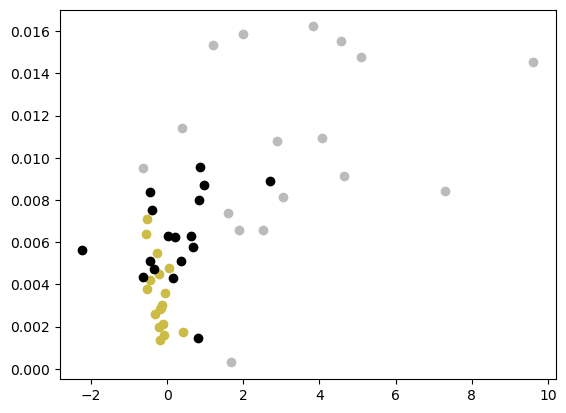

In [80]:
plt.scatter(mld_tsave_diff_rave_slim.sel(season='JJA'),Sto_jja, color=col_yellow)
plt.scatter(mld_tsave_diff_rave_slim.sel(season='DJF'),Sto_djf, color=col_grey)
plt.scatter(mld_tave_diff_rave_slim,Sto_ann, color='k')

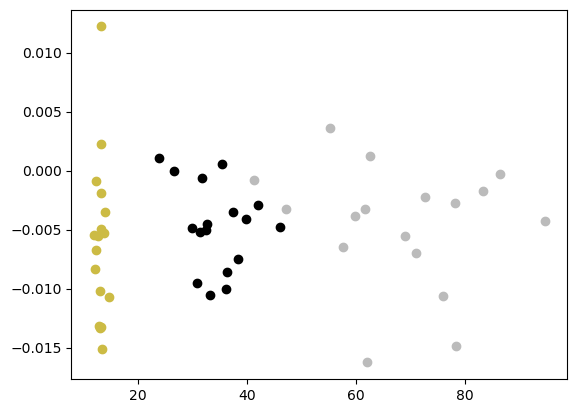

In [81]:
plt.scatter(mld_tsave_c_rave_slim.sel(season='JJA'),Eul_jja, color=col_yellow)
plt.scatter(mld_tsave_c_rave_slim.sel(season='DJF'),Eul_djf, color=col_grey)
plt.scatter(mld_tave_c_rave_slim,Eul_ann, color='k')